In [1]:
#import imp library 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV 
from sklearn.metrics import r2_score,mean_absolute_error
import statsmodels as sm
import matplotlib.pyplot as plt
from string import digits
import warnings
from pandas.plotting import scatter_matrix
import math
warnings.filterwarnings('ignore')

In [2]:
#import data and read csv file & see head data
data=pd.read_excel(r"C:\Users\INPshy\Desktop\DATA Science\customer_retention_dataset.xlsx")
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [3]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)
data.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [4]:
print(data.shape,data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

data have 269 rows and 71 column ,all column data are object except Pincode. overall data is categorical 

In [5]:
#Cleaning column name
#Removing tab spaces from column name
data.columns = data.columns.str.replace('\t','')

#Removing digits from column name
remove_digits = str.maketrans('', '', digits)
data.columns = data.columns.str.translate(remove_digits)

#Removing leading and trailling spaces from column name
data.columns = data.columns.str.strip()

In [6]:
#column overview after cleaning 
data.head(2)

Gender of respondent How old are you? Which city do you shop online from?  \
0                 Male      31-40 years                               Delhi   
1               Female      21-30 years                               Delhi   

   What is the Pin Code of where you shop online from?  \
0                                             110009     
1                                             110030     

  Since How Long You are Shopping Online ?  \
0                            Above 4 years   
1                            Above 4 years   

  How many times you have made an online purchase in the past  year?  \
0                                        31-40 times                   
1                                 41 times and above                   

  How do you access the internet while shopping on-line?  \
0                                            Dial-up       
1                                              Wi-Fi       

  Which device do you use to access the online shopping?  \
0                                            Desktop       
1                                         Smartphone       

  What is the screen size of your mobile device?  \
0                                         Others   
1                                     4.7 inches   

  What is the operating system (OS) of your device?  \
0                             Window/windows Mobile   
1                                           IOS/Mac   

  What browser do you run on your device to access the website?  \
0                                      Google chrome              
1                                      Google chrome              

  Which channel did you follow to arrive at your favorite online store for the first time?  \
0                                      Search Engine                                         
1                                      Search Engine                                         

  After first visit, how do you reach the online retail store?  \
0                                      Search Engine             
1                                    Via application             

  How much time do you explore the e- retail store before making a purchase decision?  \
0                                          6-10 mins                                    
1                                  more than 15 mins                                    

  What is your preferred payment Option?  \
0     E-wallets (Paytm, Freecharge etc.)   
1                     Credit/Debit cards   

  How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?  \
0                                          Sometimes                                                          
1                                    Very frequently                                                          

  Why did you abandon the “Bag”, “Shopping Cart”?  \
0                                   Lack of trust   
1                       Promo code not applicable   

  The content on the website must be easy to read and understand  \
0                                          Agree (4)               
1                                 Strongly agree (5)               

  Information on similar product to the one highlighted  is important for product comparison  \
0                                    Indifferent (3)                                           
1                                 Strongly agree (5)                                           

  Complete information on listed seller and product being offered is important for purchase decision.  \
0                                    Indifferent (3)                                                    
1                                 Strongly agree (5)                                                    

  All relevant information on listed products must be stated clearly  \
0                                          Agree (4)                   
1              

In [7]:
#check how many unique value present in each column
data.nunique()

Gender of respondent                                                                                          2
How old are you?                                                                                              5
Which city do you shop online from?                                                                          11
What is the Pin Code of where you shop online from?                                                          39
Since How Long You are Shopping Online ?                                                                      5
How many times you have made an online purchase in the past  year?                                            6
How do you access the internet while shopping on-line?                                                        4
Which device do you use to access the online shopping?                                                        4
What is the screen size of your mobile device?                                                          

In [8]:
Customer_info=['Gender of respondent','How old are you?','Which city do you shop online from?',
               'What is the Pin Code of where you shop online from?','Since How Long You are Shopping Online ?',
                   'How many times you have made an online purchase in the past  year?','How do you access the internet while shopping on-line?','Which device do you use to access the online shopping?']

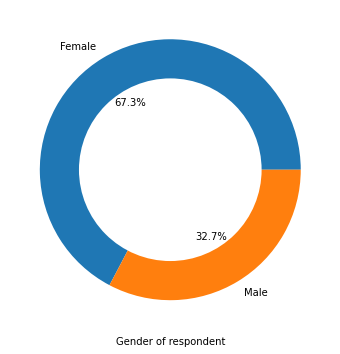

<Figure size 432x288 with 0 Axes>

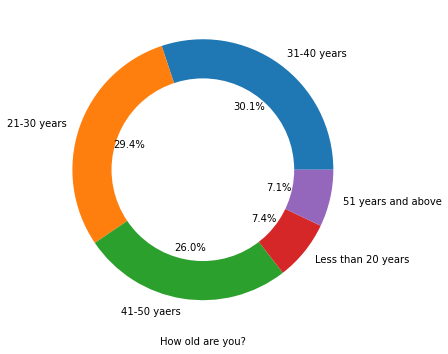

<Figure size 432x288 with 0 Axes>

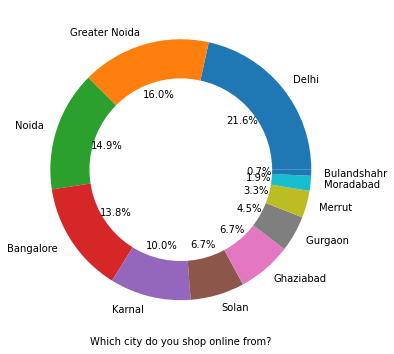

<Figure size 432x288 with 0 Axes>

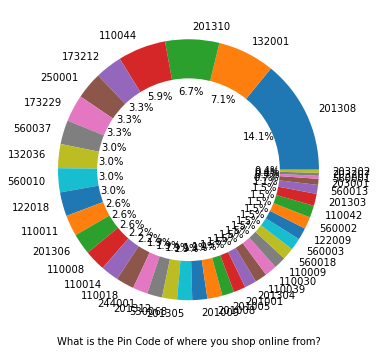

<Figure size 432x288 with 0 Axes>

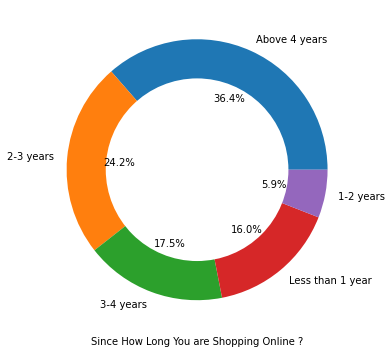

<Figure size 432x288 with 0 Axes>

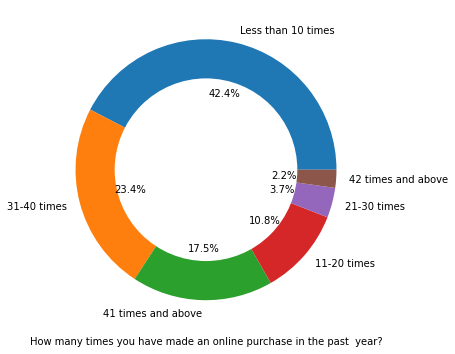

<Figure size 432x288 with 0 Axes>

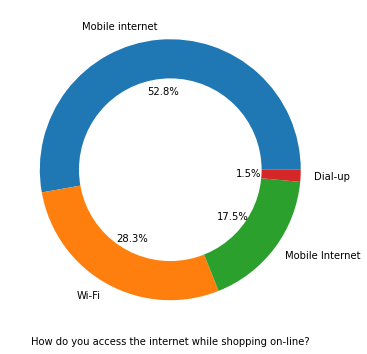

<Figure size 432x288 with 0 Axes>

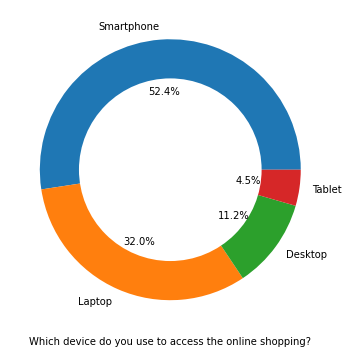

<Figure size 432x288 with 0 Axes>

In [9]:
for i in Customer_info:
        plt.figure(figsize=(8,6))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure()

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

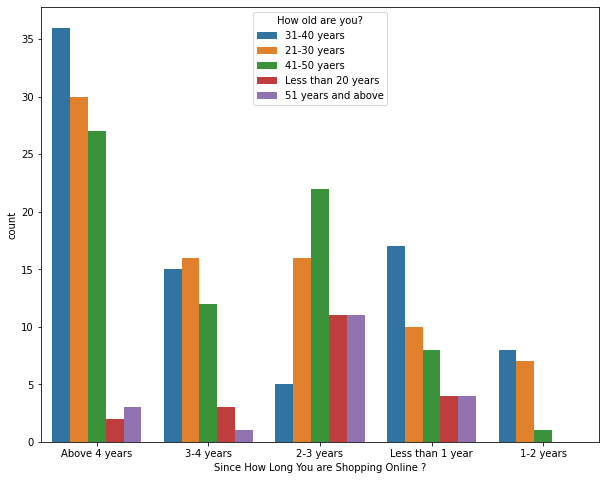

In [10]:
#online retail shopping analysis of age group who does online shopping
plt.figure(figsize=(10,8))
sns.countplot(data['Since How Long You are Shopping Online ?'],hue=data['How old are you?'])

<AxesSubplot:xlabel='Trust that the online retail store will fulfill its part of the transaction at the stipulated time', ylabel='count'>

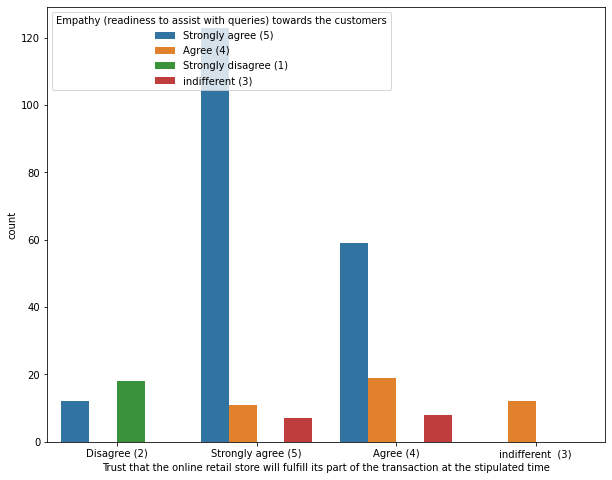

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data['Trust that the online retail store will fulfill its part of the transaction at the stipulated time']
              ,hue=data['Empathy (readiness to assist with queries) towards the customers'])

<AxesSubplot:xlabel='Online shopping gives monetary benefit and discounts', ylabel='count'>

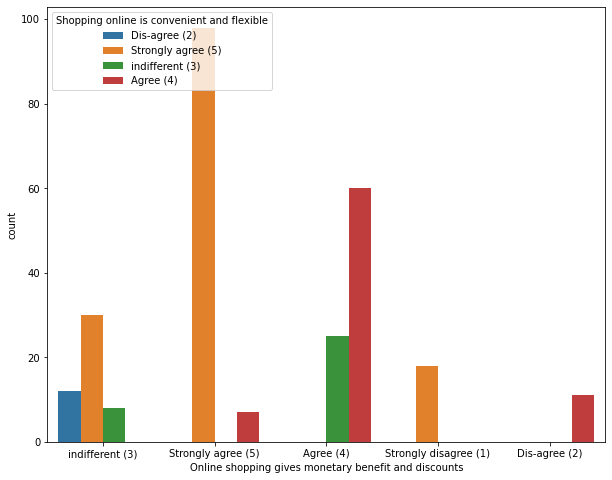

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(data['Online shopping gives monetary benefit and discounts']
              ,hue=data['Shopping online is convenient and flexible'])

<AxesSubplot:xlabel='How many times you have made an online purchase in the past  year?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

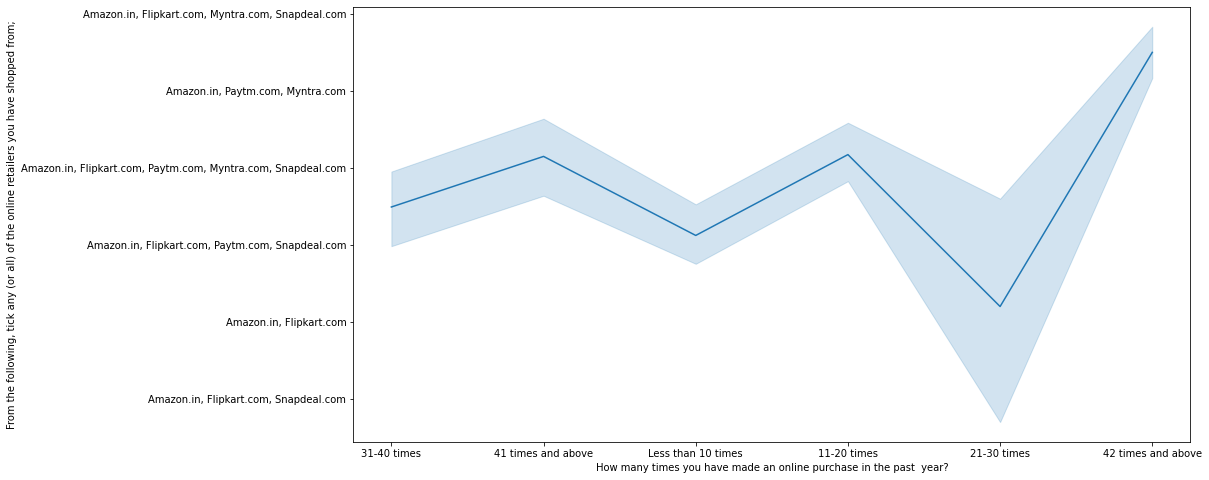

In [15]:
#analysis of homy many people do more frequent online shopping from which brand 
plt.figure(figsize=(15,8))
sns.lineplot(data['How many times you have made an online purchase in the past  year?'],
              data['From the following, tick any (or all) of the online retailers you have shopped from;'])

<AxesSubplot:xlabel='Since How Long You are Shopping Online ?', ylabel='count'>

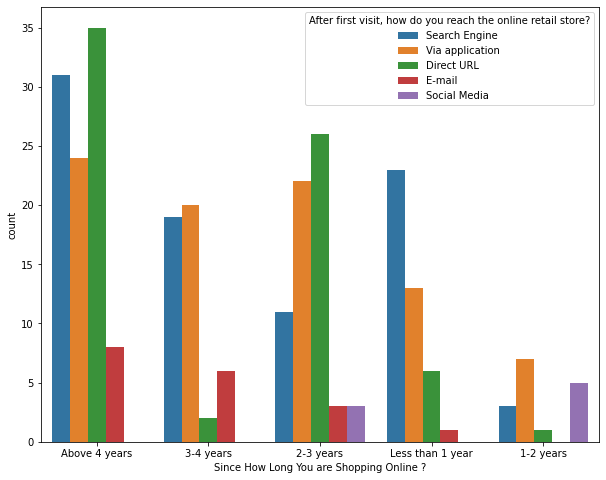

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(data['Since How Long You are Shopping Online ?']
              , hue=data['After first visit, how do you reach the online retail store?'])

In [14]:
cutomer_satisfaction=['How much time do you explore the e- retail store before making a purchase decision?',                
'What is your preferred payment Option?','How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?' ,
'Why did you abandon the “Bag”, “Shopping Cart”?','The content on the website must be easy to read and understand',                                               
'Information on similar product to the one highlighted  is important for product comparison',  'Complete information on listed seller and product being offered is important for purchase decision.' ,          
'All relevant information on listed products must be stated clearly',  'Ease of navigation in website' ,                                                                                
'Loading and processing speed',                                                                                
'User friendly Interface of the website',                                                                      
'Convenient Payment methods',                                                                                    
'Trust that the online retail store will fulfill its part of the transaction at the stipulated time',            
'Empathy (readiness to assist with queries) towards the customers',                                            
'Being able to guarantee the privacy of the customer',                                                           
'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',       
'Online shopping gives monetary benefit and discounts',                                                          
'Enjoyment is derived from shopping online',                                                                     
'Shopping online is convenient and flexible',                                                                    
'Return and replacement policy of the e-tailer is important for purchase decision',                              
'Gaining access to loyalty programs is a benefit of shopping online',                                           
'Displaying quality Information on the website improves satisfaction of customers',                              
'User derive satisfaction while shopping on a good quality website or application',                             
'Net Benefit derived from shopping online can lead to users satisfaction',                                       
'User satisfaction cannot exist without trust',                                                                  
'Offering a wide variety of listed product in several category',                                                
'Provision of complete and relevant product information',                                                    
'Monetary savings' ]

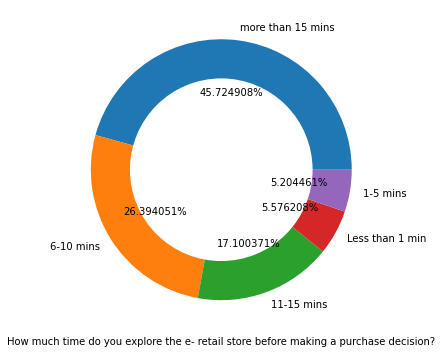

<Figure size 432x288 with 0 Axes>

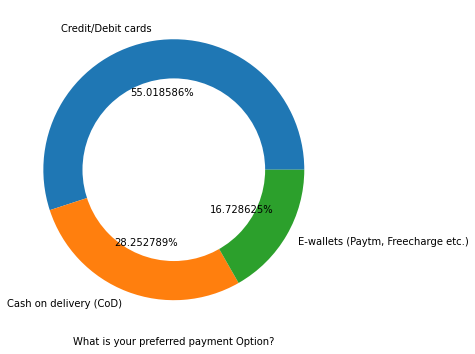

<Figure size 432x288 with 0 Axes>

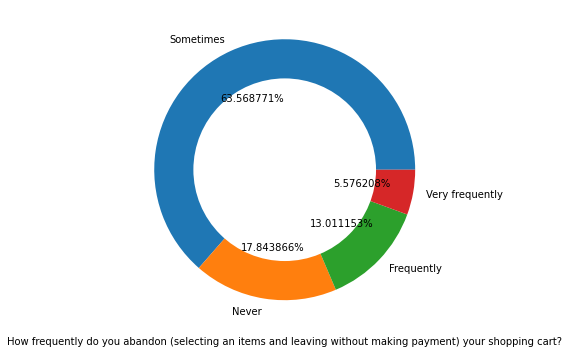

<Figure size 432x288 with 0 Axes>

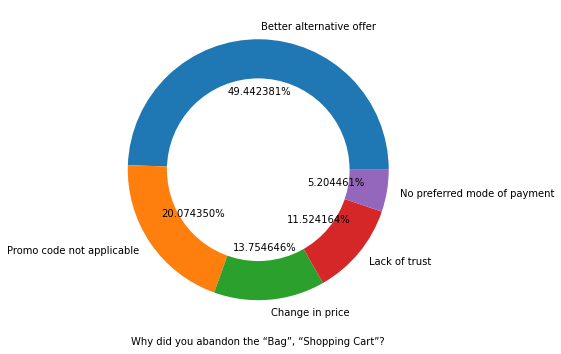

<Figure size 432x288 with 0 Axes>

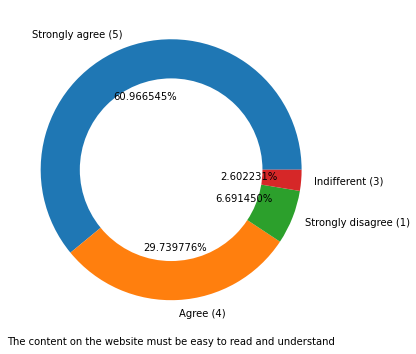

<Figure size 432x288 with 0 Axes>

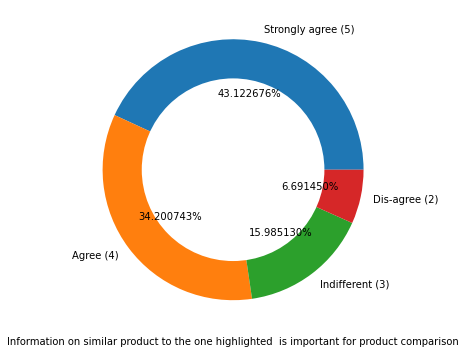

<Figure size 432x288 with 0 Axes>

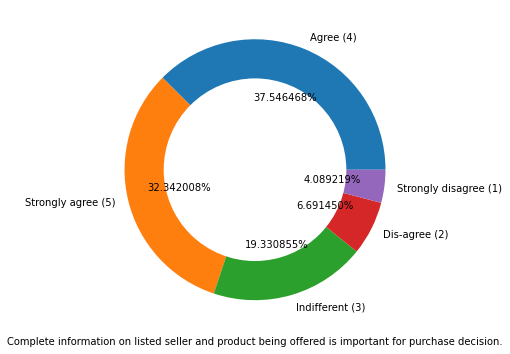

<Figure size 432x288 with 0 Axes>

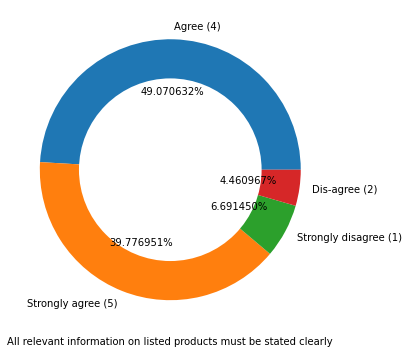

<Figure size 432x288 with 0 Axes>

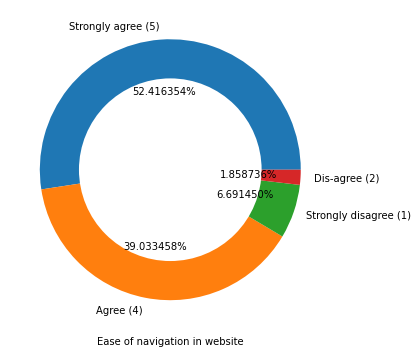

<Figure size 432x288 with 0 Axes>

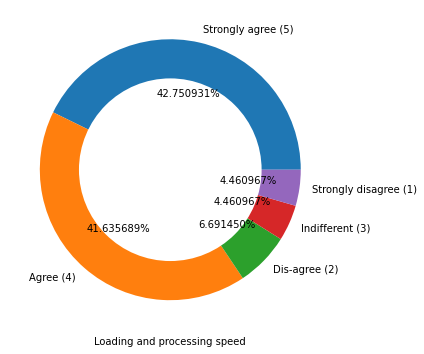

<Figure size 432x288 with 0 Axes>

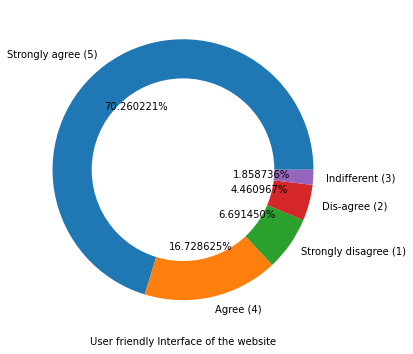

<Figure size 432x288 with 0 Axes>

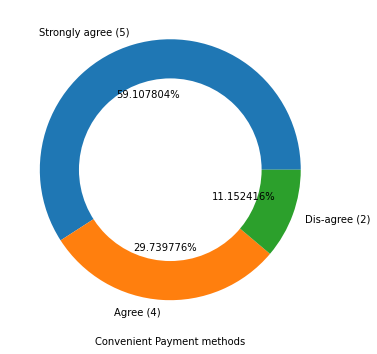

<Figure size 432x288 with 0 Axes>

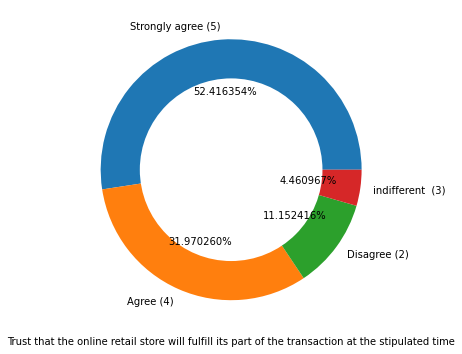

<Figure size 432x288 with 0 Axes>

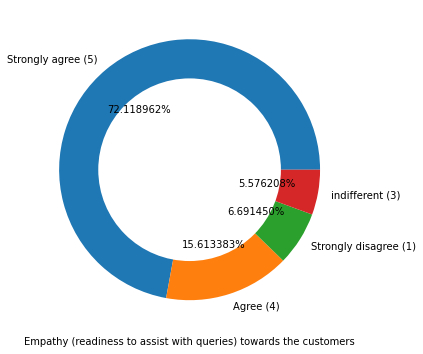

<Figure size 432x288 with 0 Axes>

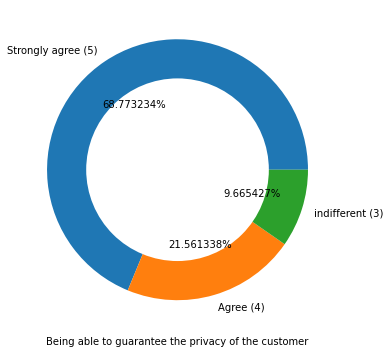

<Figure size 432x288 with 0 Axes>

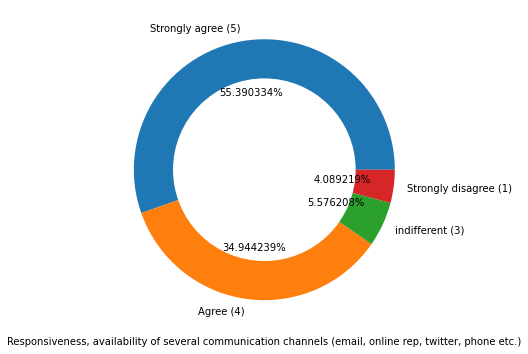

<Figure size 432x288 with 0 Axes>

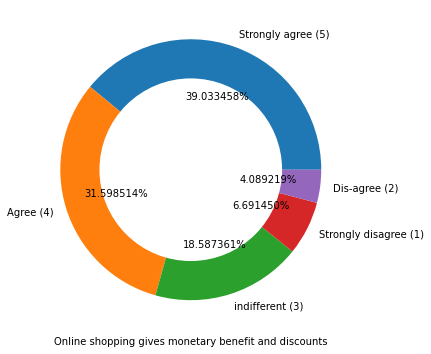

<Figure size 432x288 with 0 Axes>

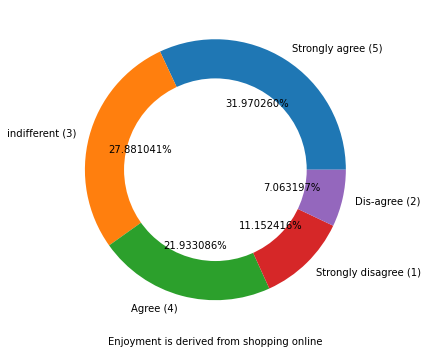

<Figure size 432x288 with 0 Axes>

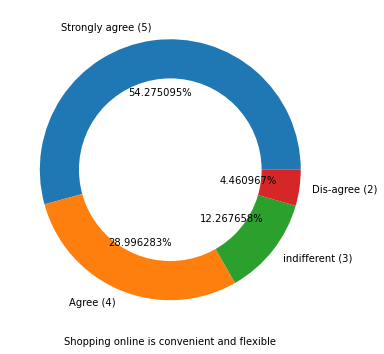

<Figure size 432x288 with 0 Axes>

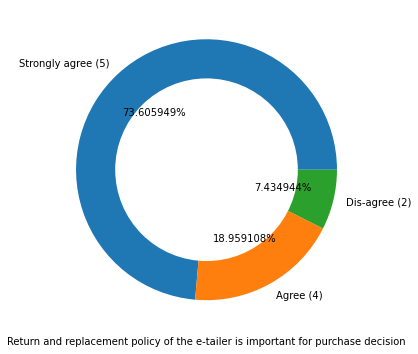

<Figure size 432x288 with 0 Axes>

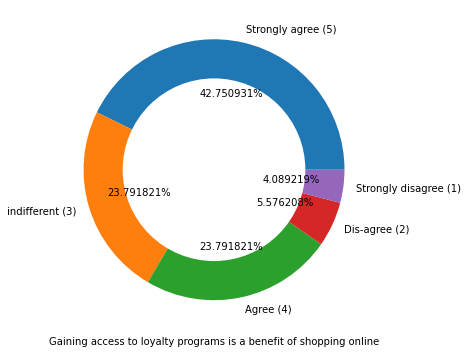

<Figure size 432x288 with 0 Axes>

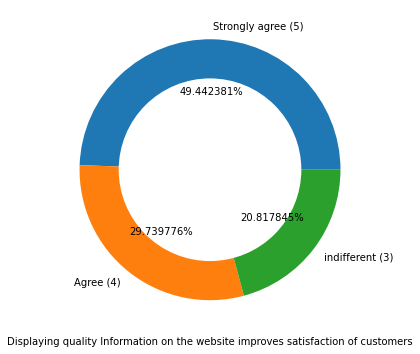

<Figure size 432x288 with 0 Axes>

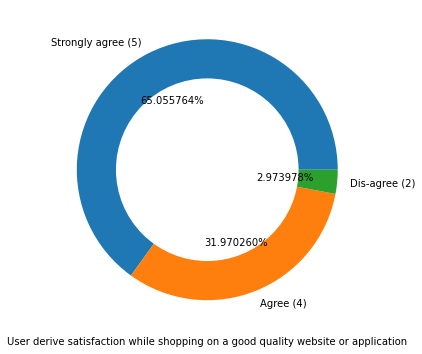

<Figure size 432x288 with 0 Axes>

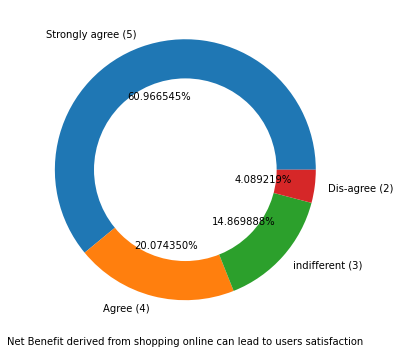

<Figure size 432x288 with 0 Axes>

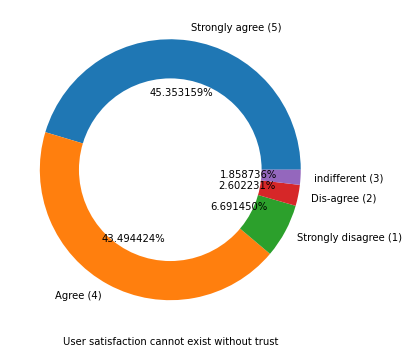

<Figure size 432x288 with 0 Axes>

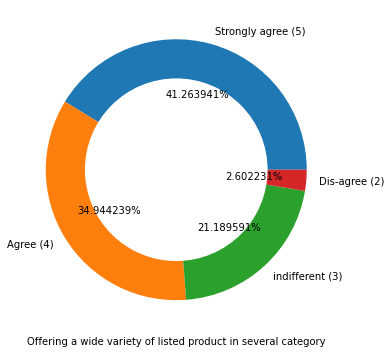

<Figure size 432x288 with 0 Axes>

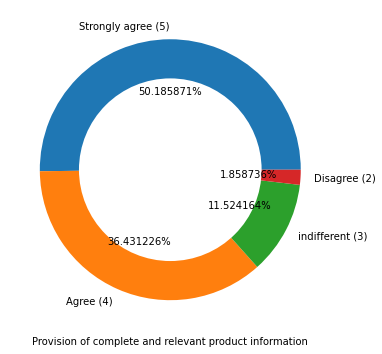

<Figure size 432x288 with 0 Axes>

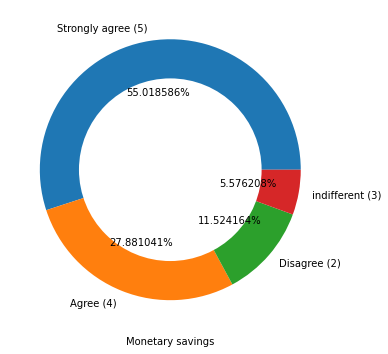

<Figure size 432x288 with 0 Axes>

In [15]:
for i in cutomer_satisfaction:
        plt.figure(figsize=(8,6))
        data[i].value_counts().plot.pie(autopct='%2f%%')
        centre=plt.Circle((0,0),0.7,fc='white')
        fig=plt.gcf()
        fig.gca().add_artist(centre)
        plt.xlabel(i)
        plt.ylabel('')
        plt.figure() 

In [16]:
Brand=['Easy to use website or application','Visual appealing web-page layout', 'Wild variety of product on offer',
'Complete, relevant description information of products','Fast loading website speed of website and application',
'Reliability of the website or application','Quickness to complete purchase','Availability of several payment options', 'Speedy order delivery',
'Privacy of customers’ information','Security of customer financial information','Perceived Trustworthiness',
'Presence of online assistance through multi-channel']

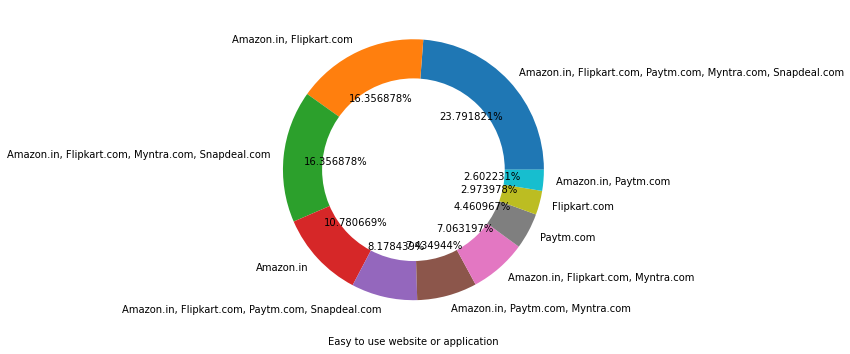

<Figure size 432x288 with 0 Axes>

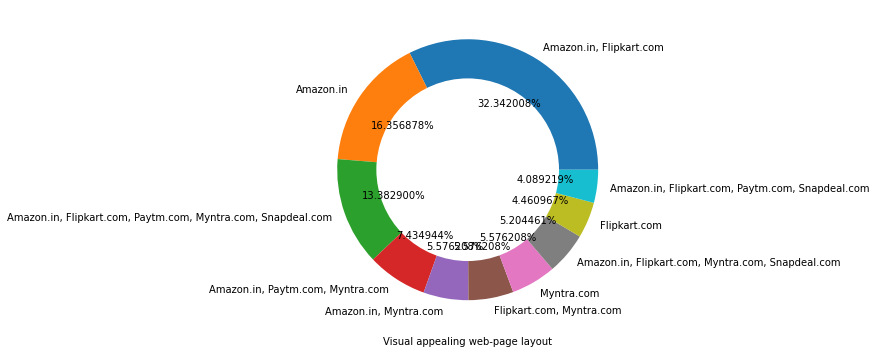

<Figure size 432x288 with 0 Axes>

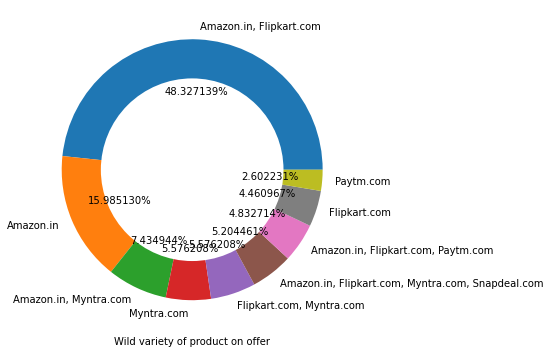

<Figure size 432x288 with 0 Axes>

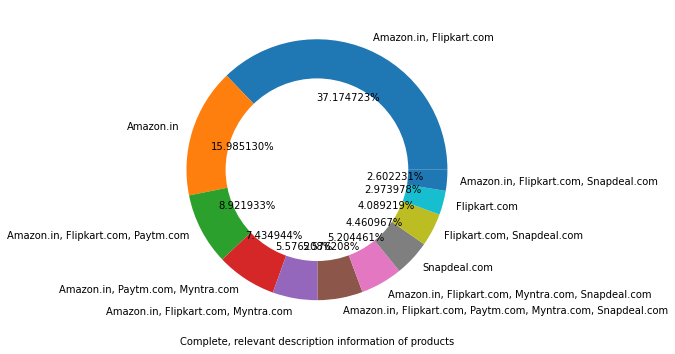

<Figure size 432x288 with 0 Axes>

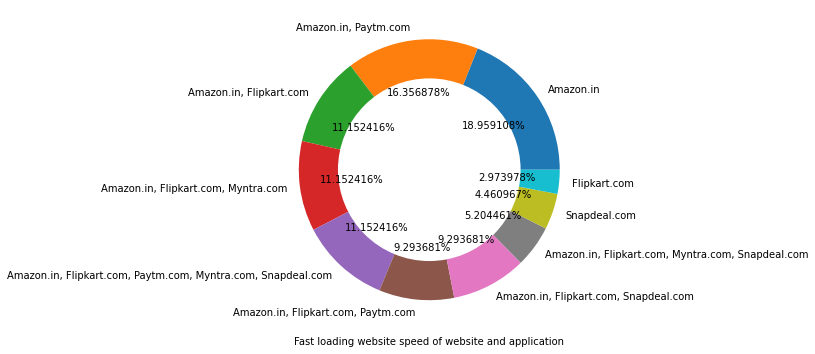

<Figure size 432x288 with 0 Axes>

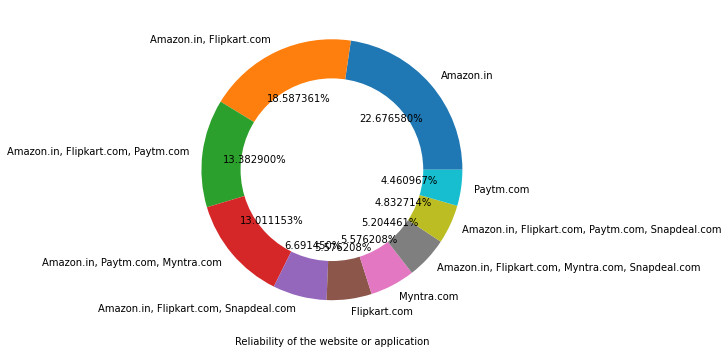

<Figure size 432x288 with 0 Axes>

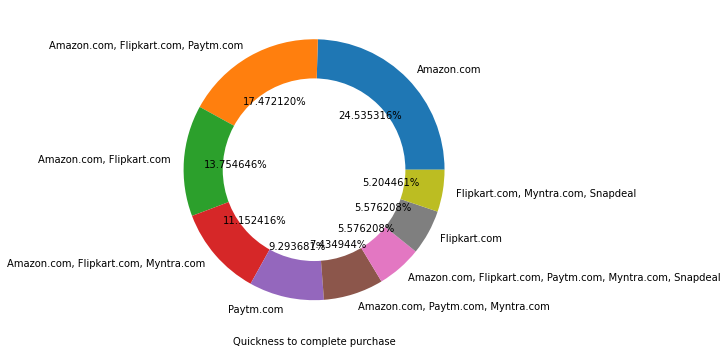

<Figure size 432x288 with 0 Axes>

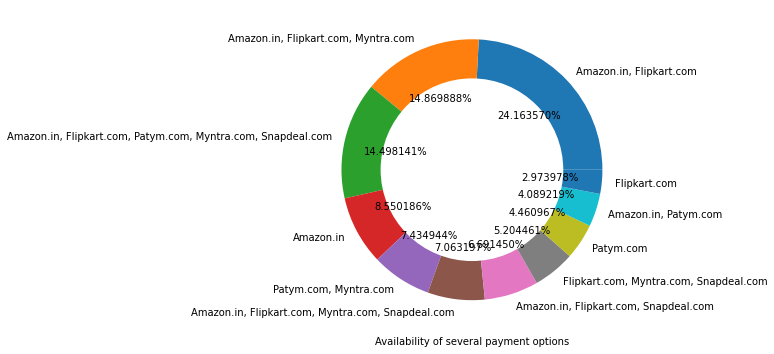

<Figure size 432x288 with 0 Axes>

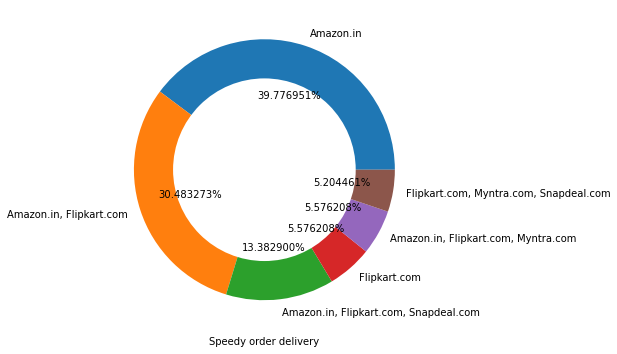

<Figure size 432x288 with 0 Axes>

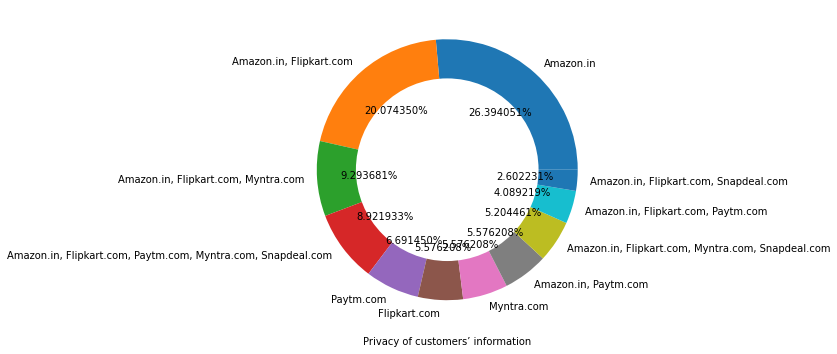

<Figure size 432x288 with 0 Axes>

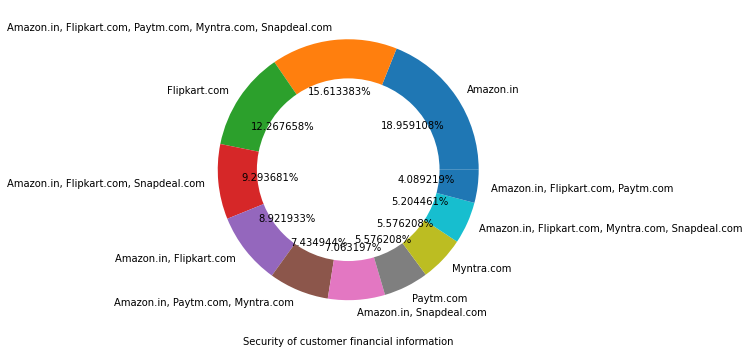

<Figure size 432x288 with 0 Axes>

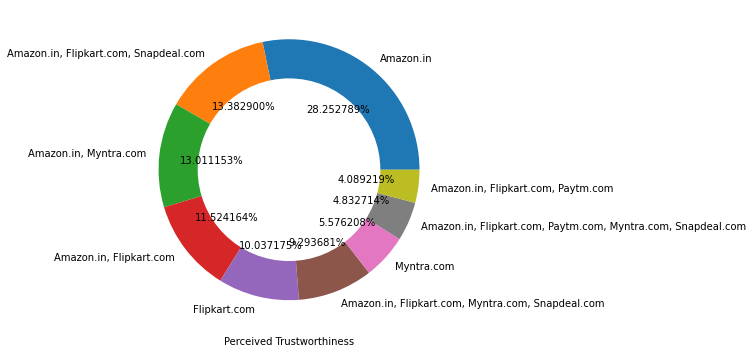

<Figure size 432x288 with 0 Axes>

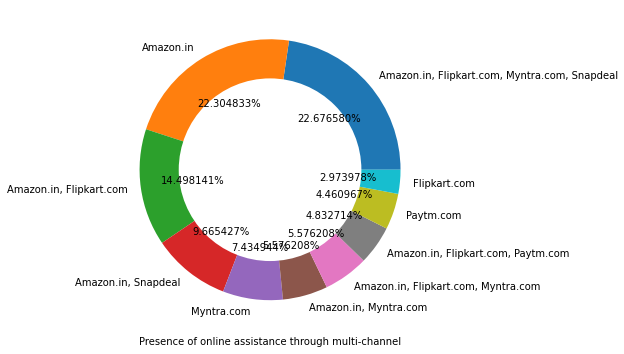

<Figure size 432x288 with 0 Axes>

In [17]:
for i in Brand:
    
    plt.figure(figsize=(8,6))
    
    data[i].value_counts().plot.pie(autopct='%2f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure() 

In [22]:
sales=['Longer time to get logged in (promotion, sales period)',                                                     
'Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)',                                                          
'Longer page loading time (promotion, sales period)','Limited mode of payment on most products (promotion, sales period)',                                            
'Longer delivery period','Change in website/Application design','Frequent disruption when moving from one page to another',                                                      
'Website is as efficient as before', 'Which of the Indian online retailer would you recommend to a friend?'] 

In [23]:
#select last 61 column to 71 column data
sales=data.iloc[::,61:71]

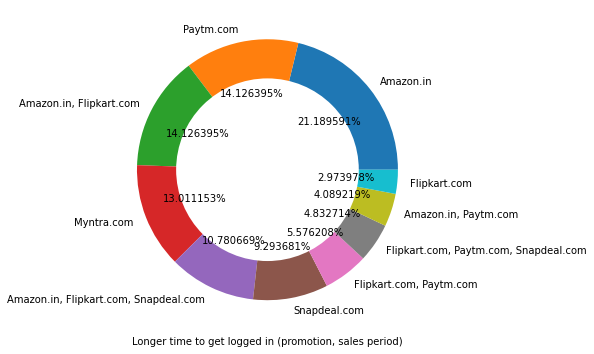

<Figure size 432x288 with 0 Axes>

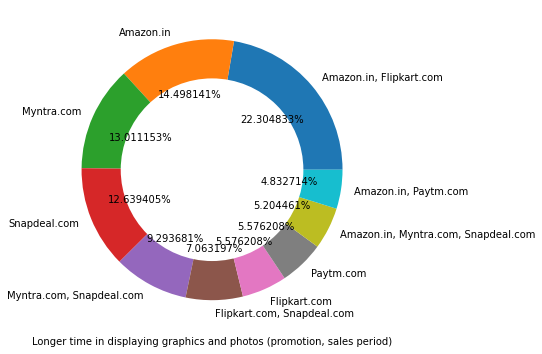

<Figure size 432x288 with 0 Axes>

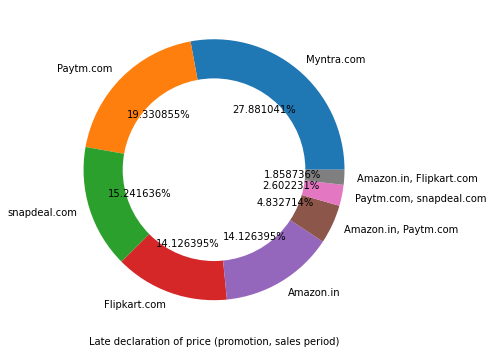

<Figure size 432x288 with 0 Axes>

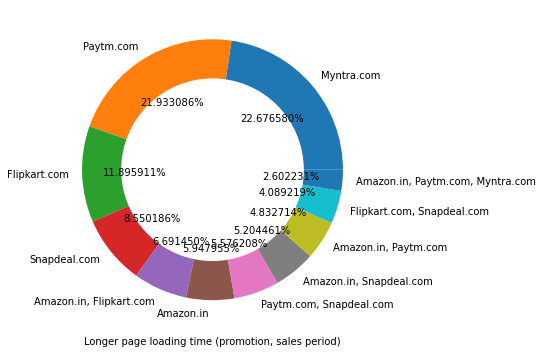

<Figure size 432x288 with 0 Axes>

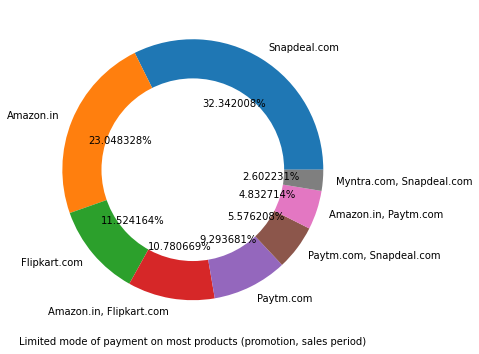

<Figure size 432x288 with 0 Axes>

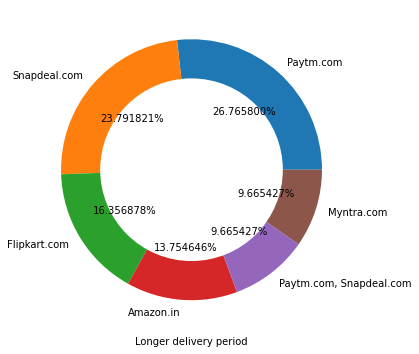

<Figure size 432x288 with 0 Axes>

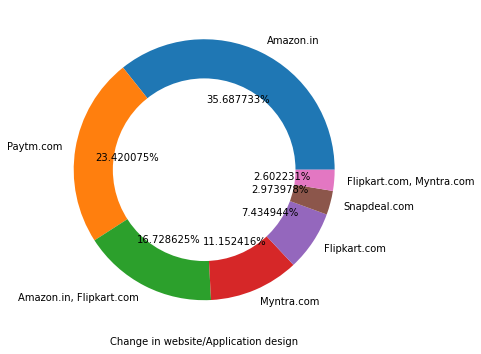

<Figure size 432x288 with 0 Axes>

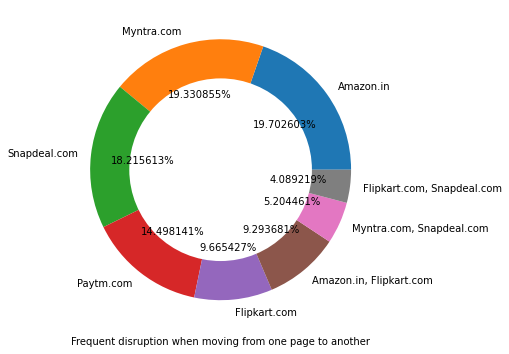

<Figure size 432x288 with 0 Axes>

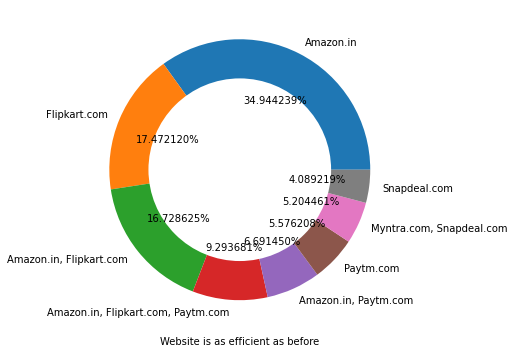

<Figure size 432x288 with 0 Axes>

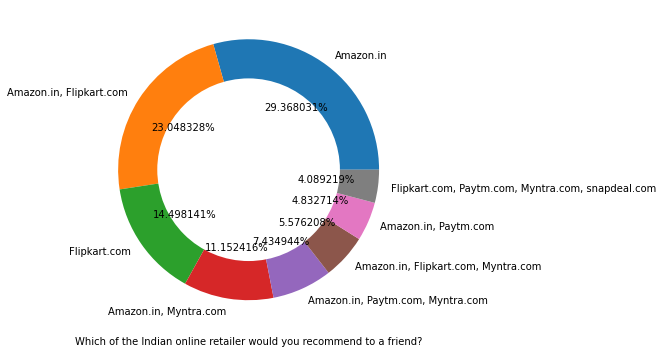

<Figure size 432x288 with 0 Axes>

In [24]:
for i in sales:
    
    plt.figure(figsize=(8,6))
    
    sales[i].value_counts().plot.pie(autopct='%2f%%')
    centre=plt.Circle((0,0),0.7,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre)
    plt.xlabel(i)
    plt.ylabel('')
    plt.figure() 

<AxesSubplot:xlabel='Why did you abandon the “Bag”, “Shopping Cart”?', ylabel='From the following, tick any (or all) of the online retailers you have shopped from;'>

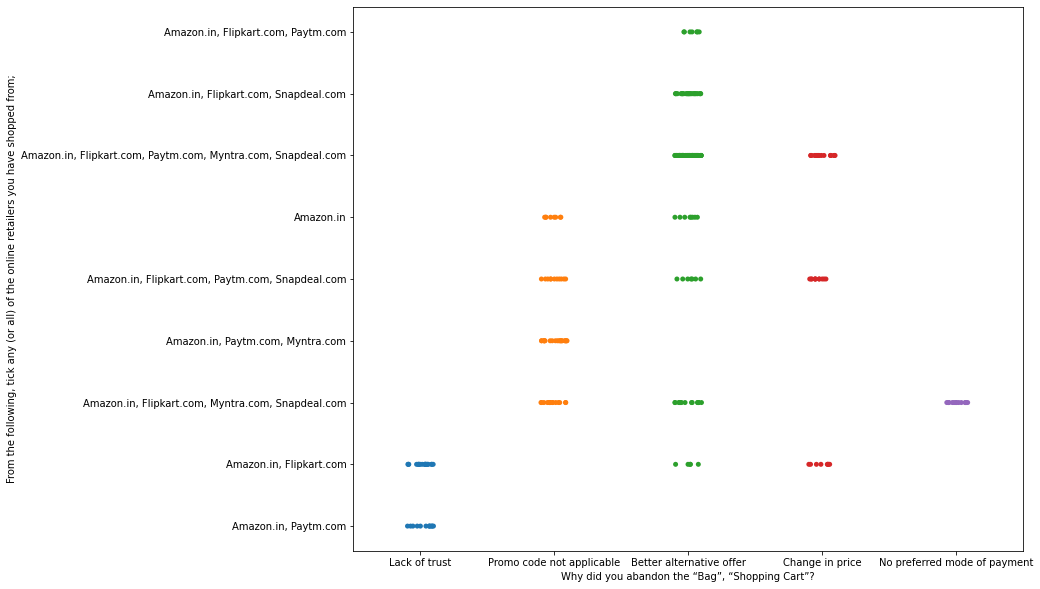

In [21]:
#analysis of why did people abandon the shopping cart during checkout at last moment

plt.figure(figsize=(12,10))
sns.stripplot(data['Why did you abandon the “Bag”, “Shopping Cart”?'],
              data['From the following, tick any (or all) of the online retailers you have shopped from;'])

In [26]:
#Analysis of which india online retailer would you recommend to a friend
sales=['Longer time to get logged in (promotion, sales period)',                                                     
'Longer time in displaying graphics and photos (promotion, sales period)','Late declaration of price (promotion, sales period)',                                                          
'Longer page loading time (promotion, sales period)','Limited mode of payment on most products (promotion, sales period)',                                            
'Longer delivery period','Change in website/Application design','Frequent disruption when moving from one page to another',                                                      
'Website is as efficient as before', 'Which of the Indian online retailer would you recommend to a friend?'] 

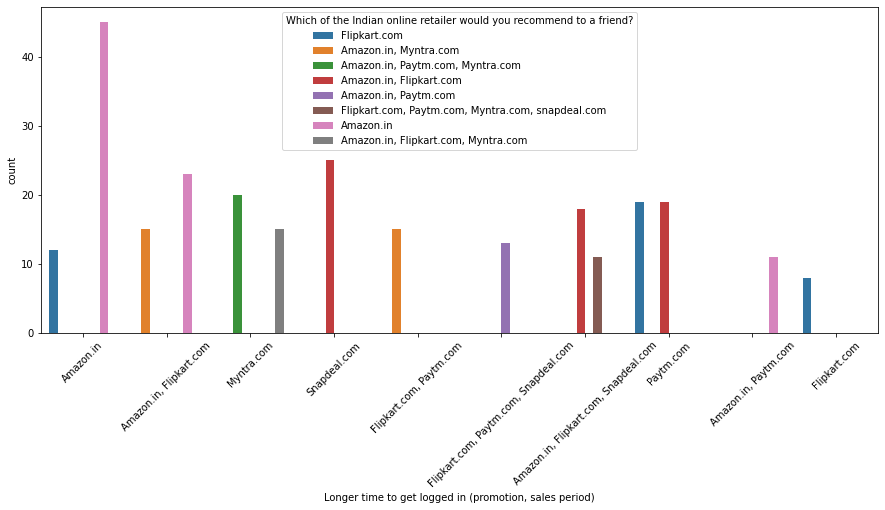

<Figure size 432x288 with 0 Axes>

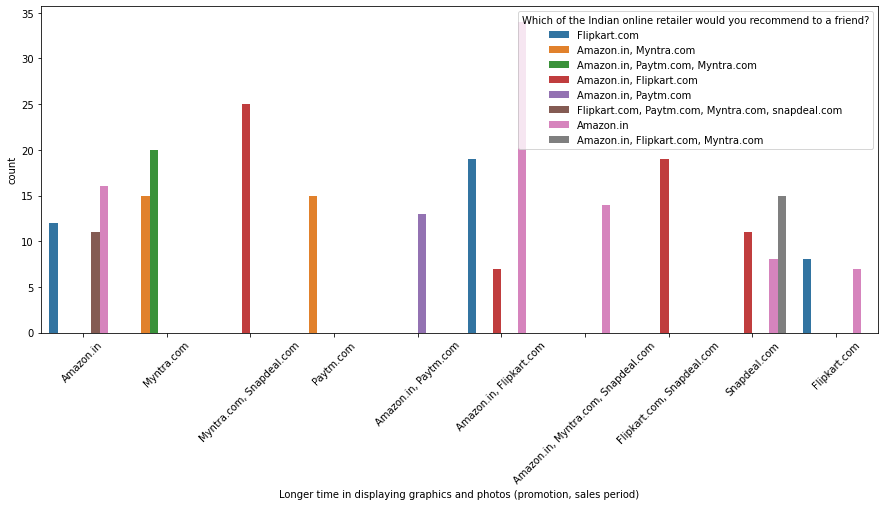

<Figure size 432x288 with 0 Axes>

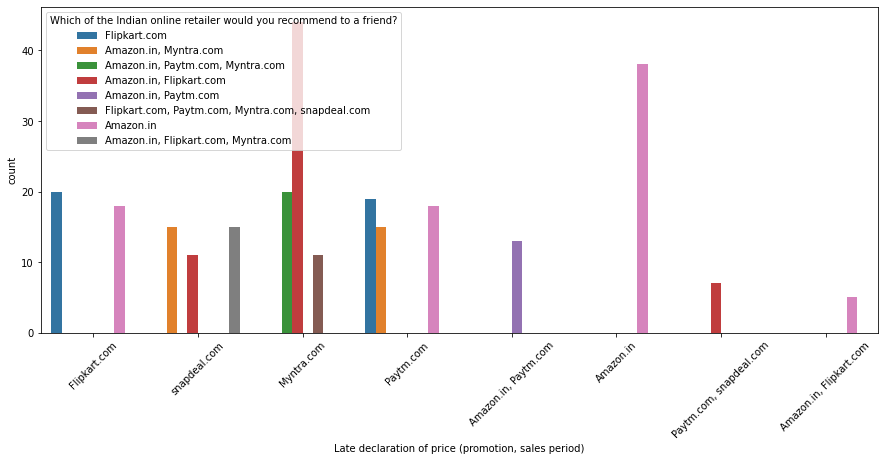

<Figure size 432x288 with 0 Axes>

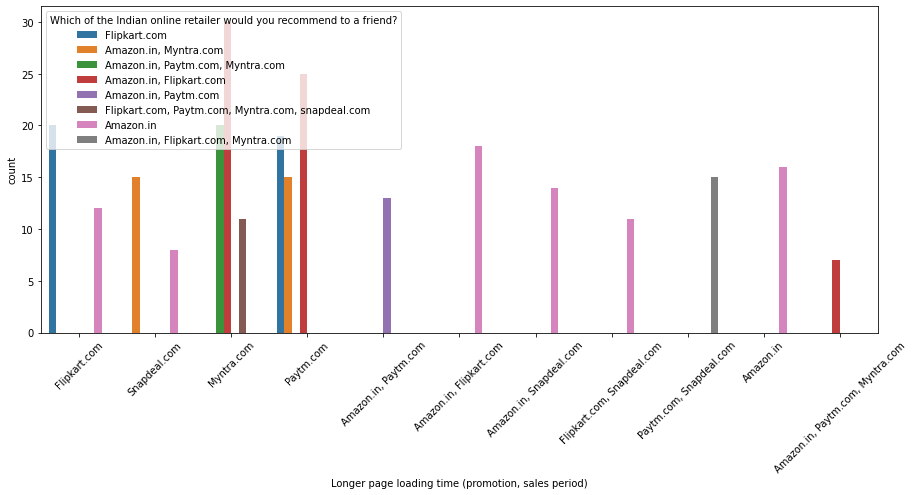

<Figure size 432x288 with 0 Axes>

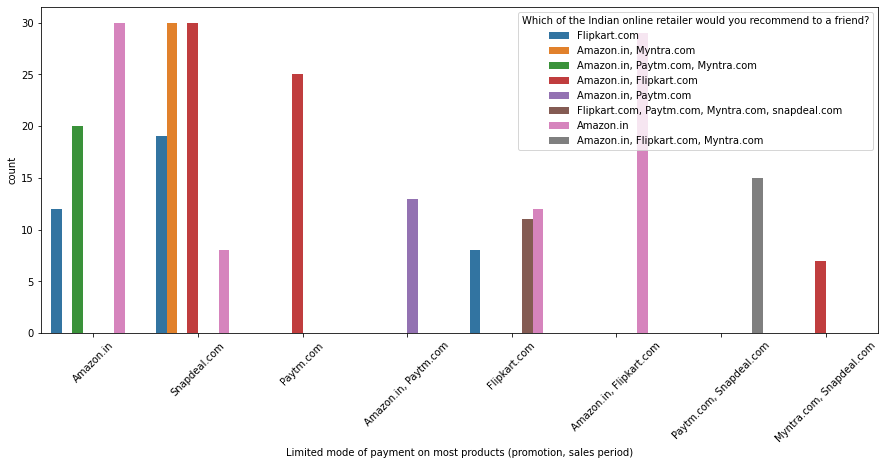

<Figure size 432x288 with 0 Axes>

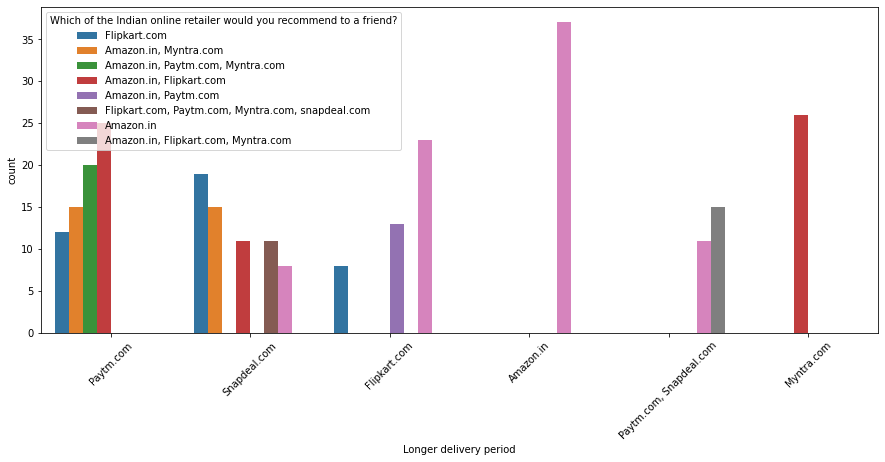

<Figure size 432x288 with 0 Axes>

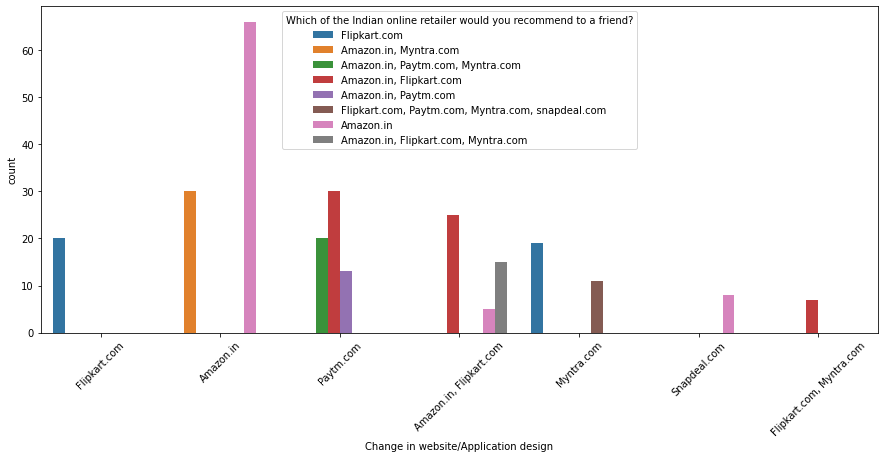

<Figure size 432x288 with 0 Axes>

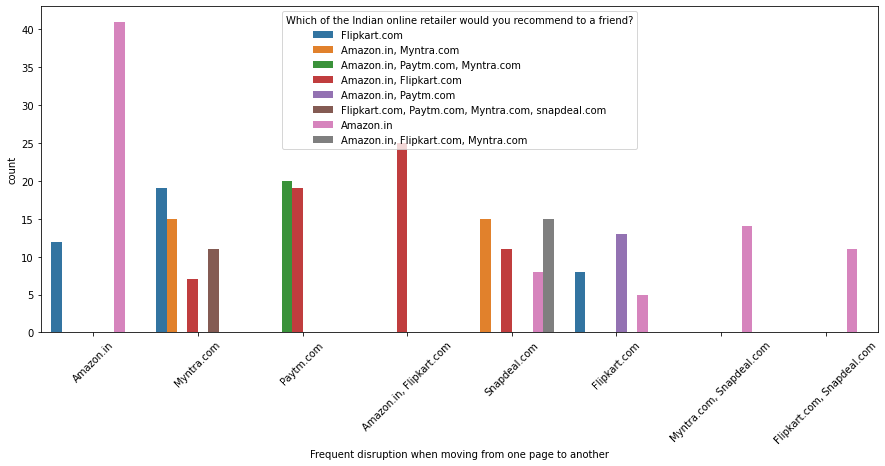

<Figure size 432x288 with 0 Axes>

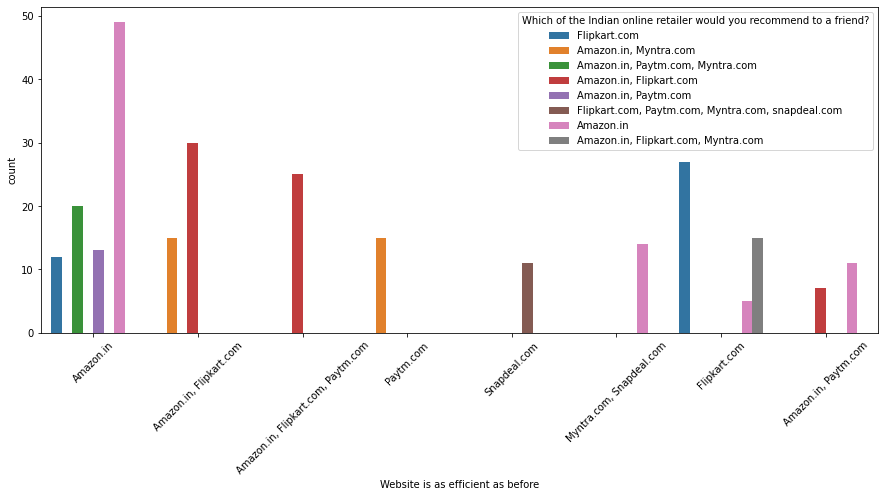

<Figure size 432x288 with 0 Axes>

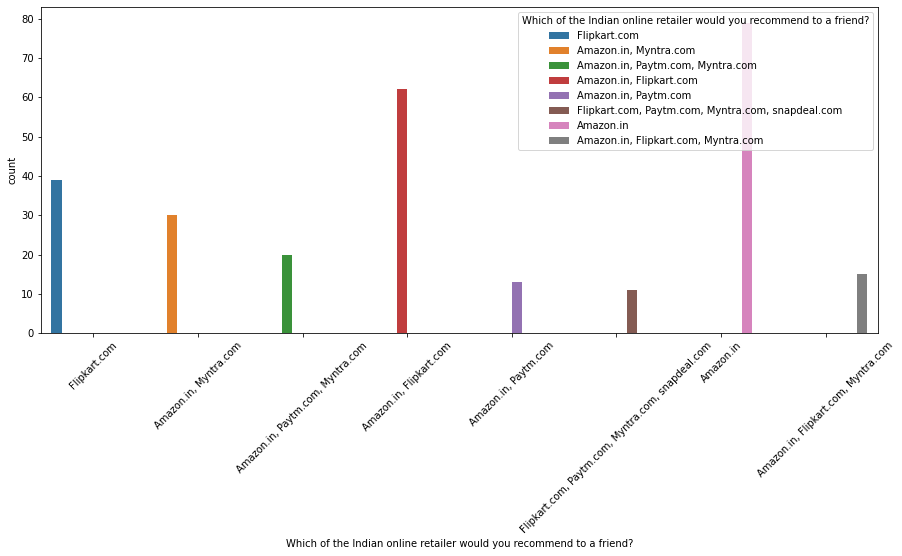

<Figure size 432x288 with 0 Axes>

In [25]:
for i in sales:
        plt.figure(figsize=(15,6))
        sns.countplot(data[i],hue=data['Which of the Indian online retailer would you recommend to a friend?'])
        plt.xticks(rotation=45)
        plt.figure()

In [29]:
#Analysis of Secirity of customer financial information 
Brand=['Easy to use website or application','Visual appealing web-page layout', 'Wild variety of product on offer',
'Complete, relevant description information of products','Fast loading website speed of website and application',
'Reliability of the website or application','Quickness to complete purchase','Availability of several payment options', 'Speedy order delivery',
'Privacy of customers’ information','Security of customer financial information','Perceived Trustworthiness',
'Presence of online assistance through multi-channel']

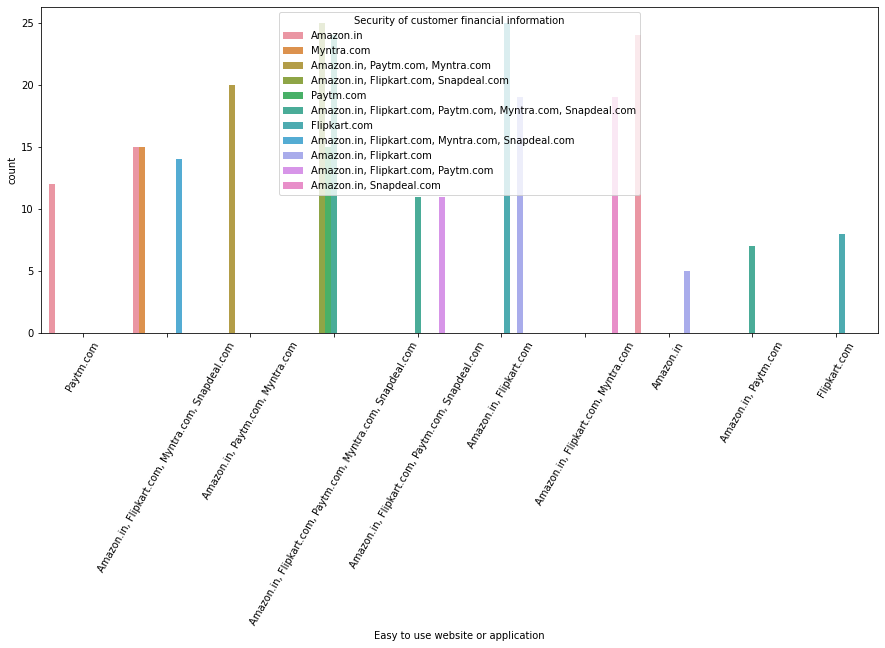

<Figure size 432x288 with 0 Axes>

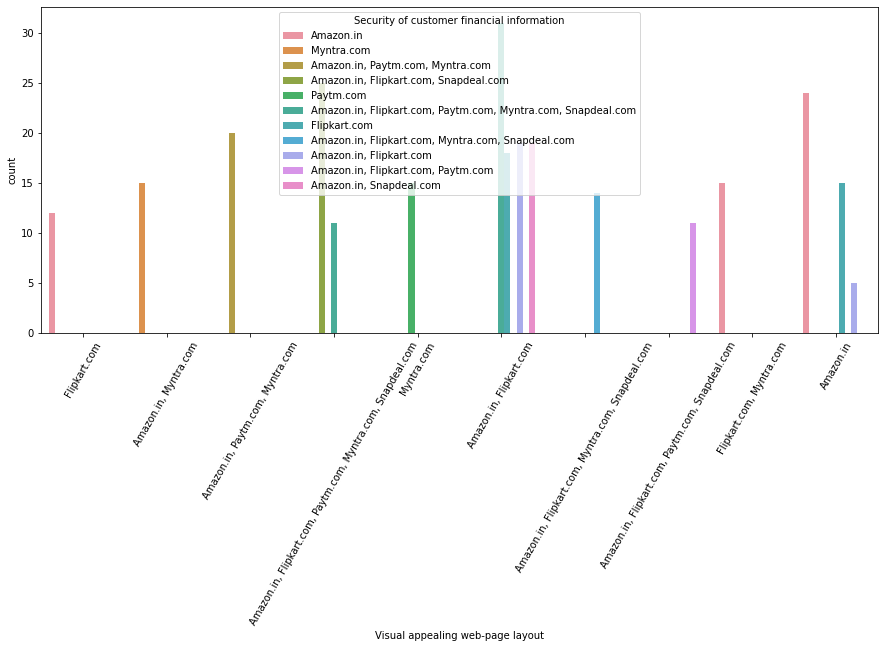

<Figure size 432x288 with 0 Axes>

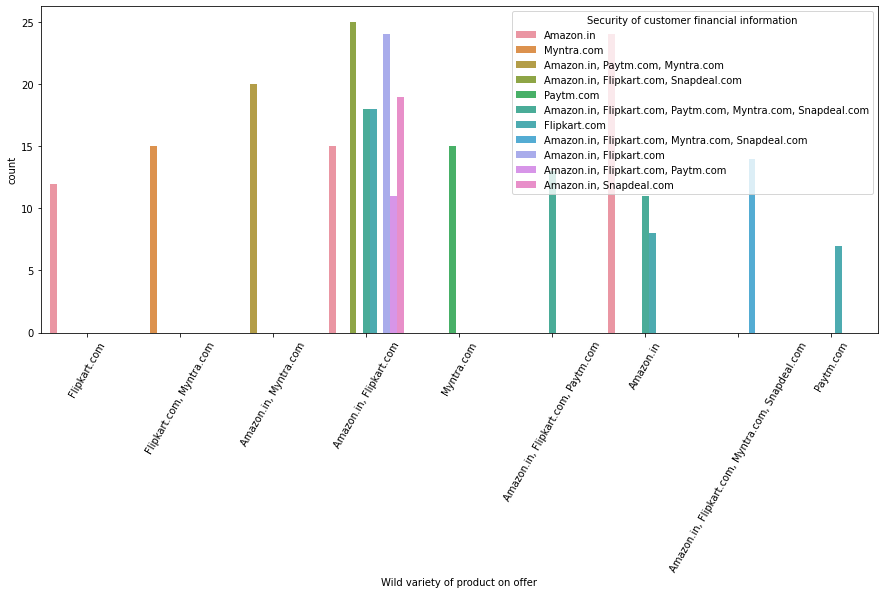

<Figure size 432x288 with 0 Axes>

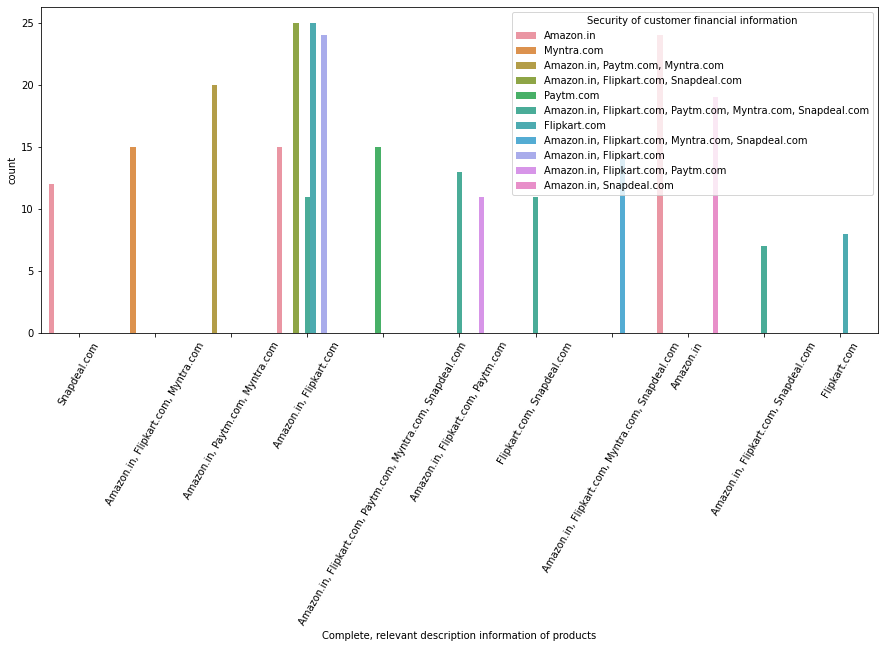

<Figure size 432x288 with 0 Axes>

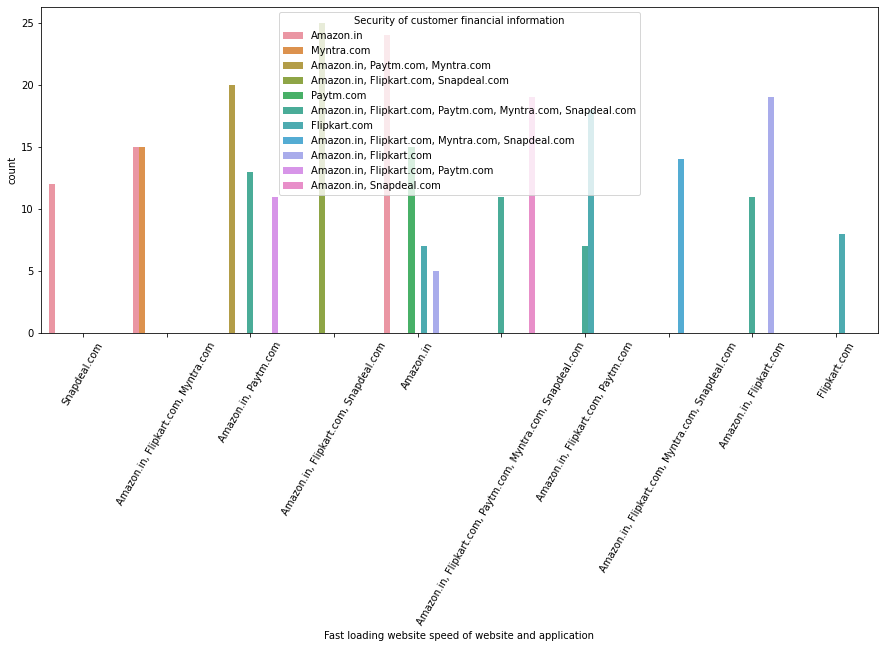

<Figure size 432x288 with 0 Axes>

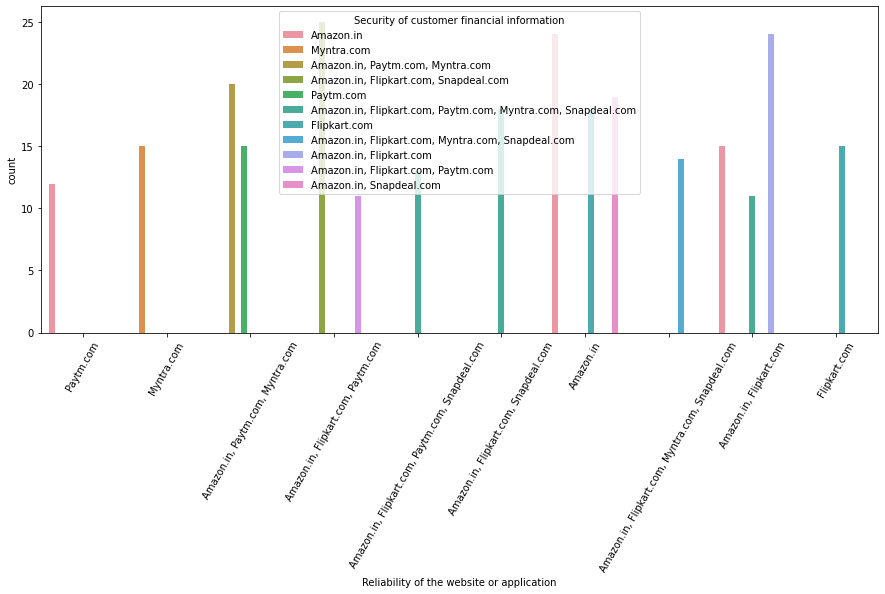

<Figure size 432x288 with 0 Axes>

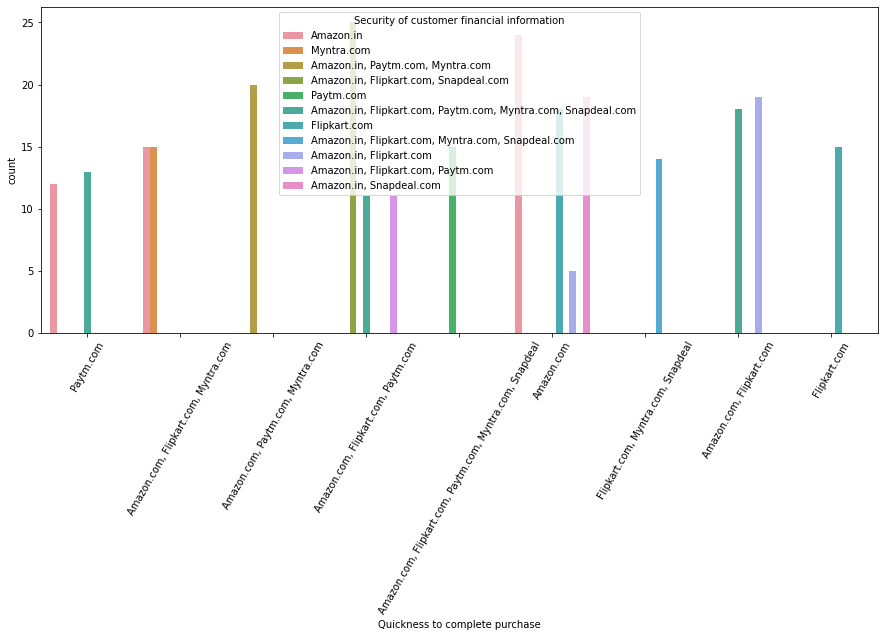

<Figure size 432x288 with 0 Axes>

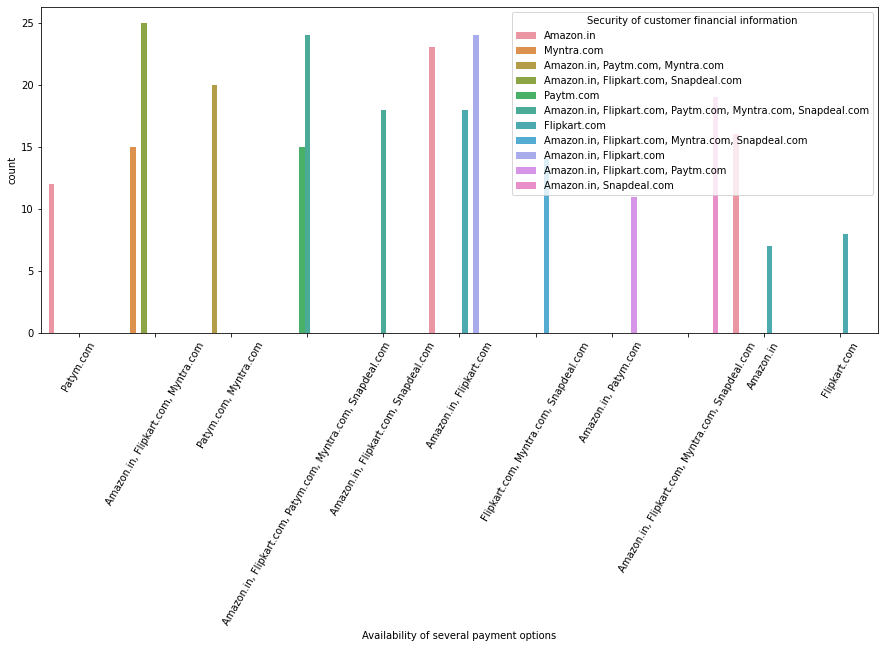

<Figure size 432x288 with 0 Axes>

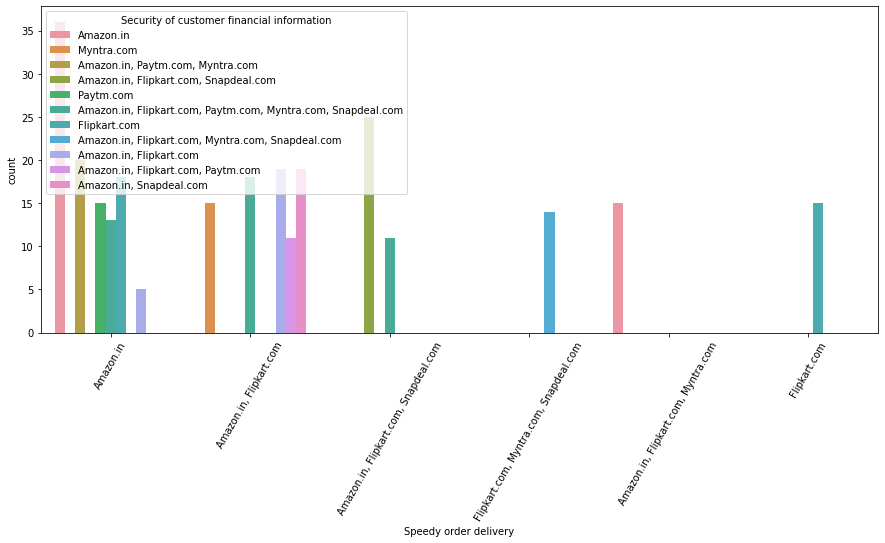

<Figure size 432x288 with 0 Axes>

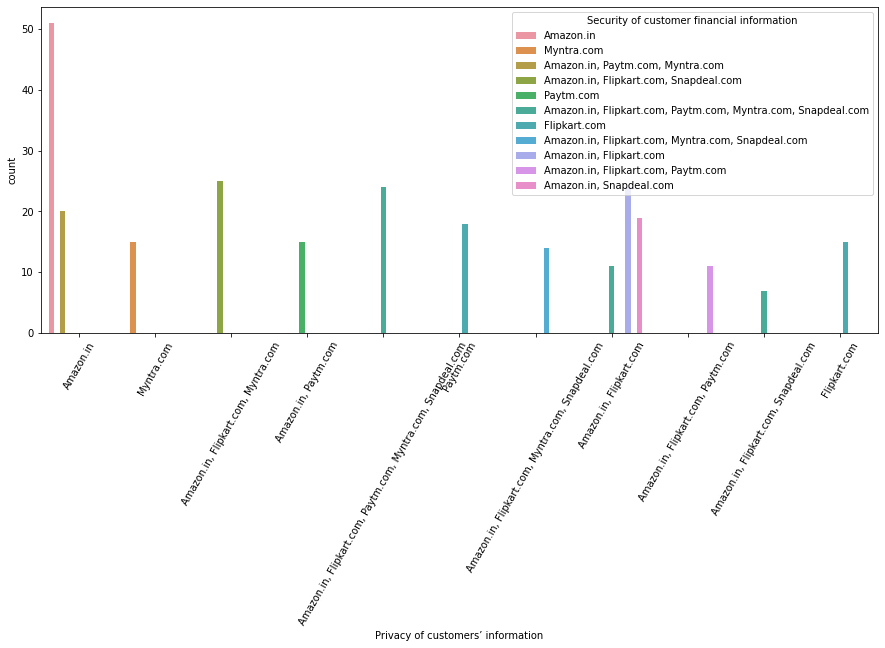

<Figure size 432x288 with 0 Axes>

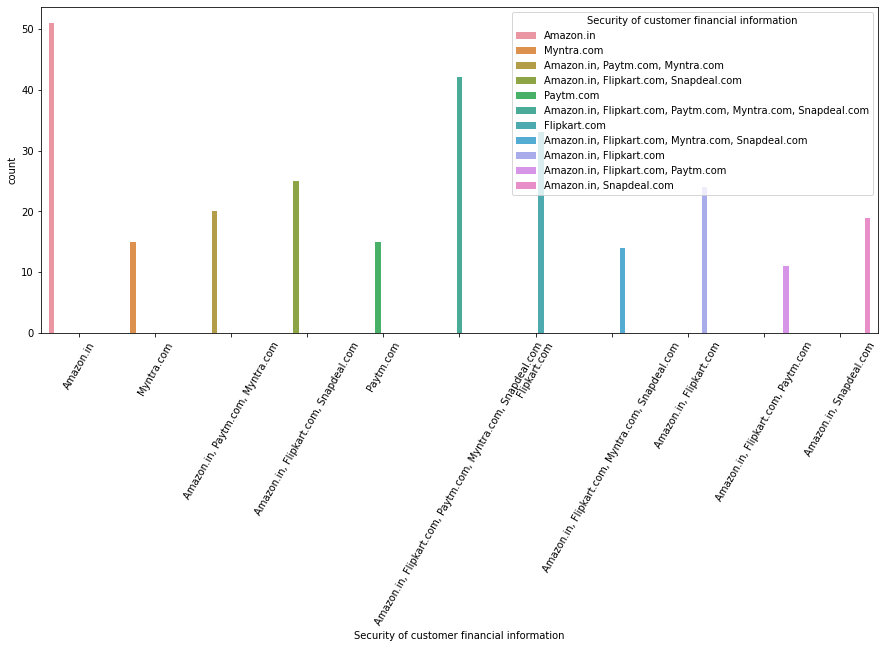

<Figure size 432x288 with 0 Axes>

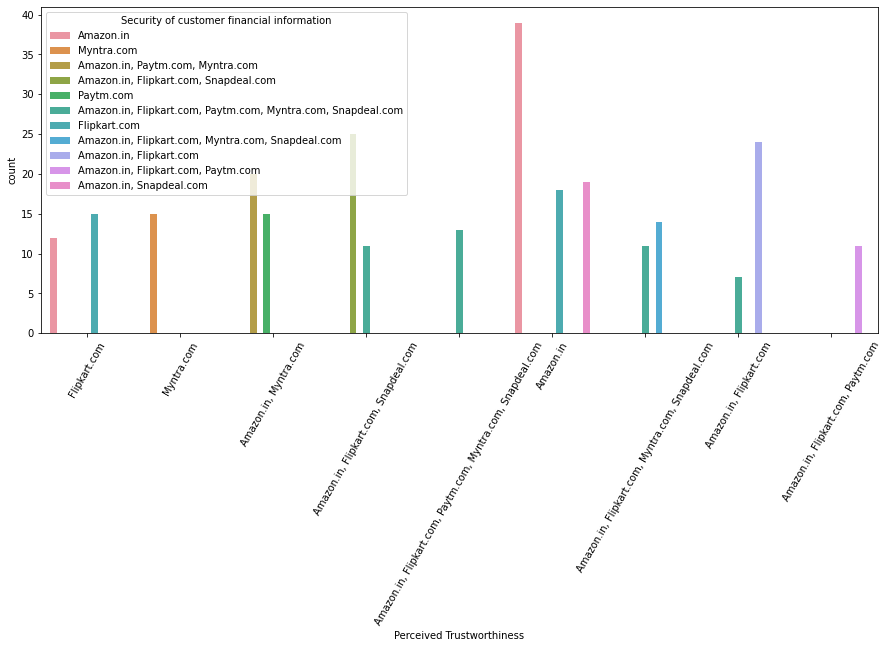

<Figure size 432x288 with 0 Axes>

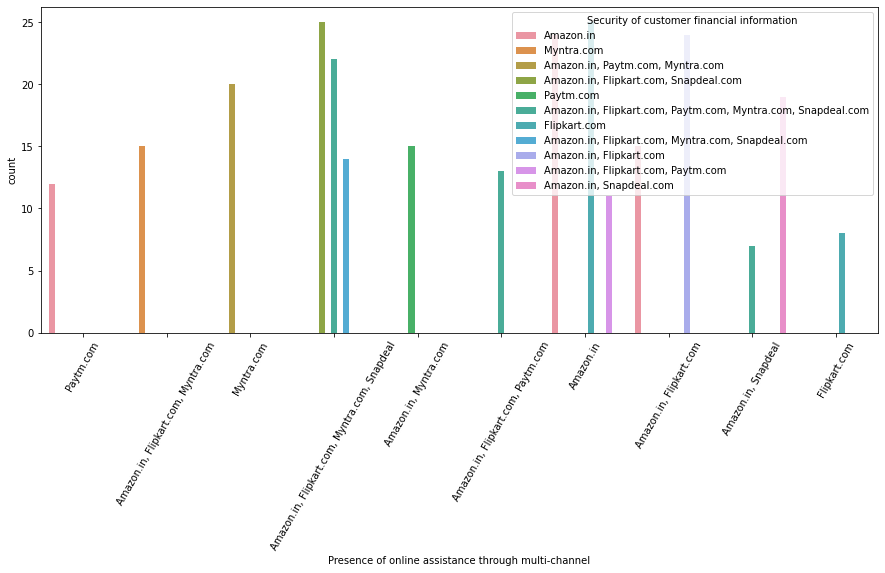

<Figure size 432x288 with 0 Axes>

In [34]:
for i in Brand:
    plt.figure(figsize=(15,6))
    sns.countplot(data[i],hue=data['Security of customer financial information'])
    plt.xticks(rotation=60)
    plt.figure()

In [39]:
#Analysis of Gaining access to loyalty programs is a benefit of shopping online 
loyalty=['Trust that the online retail store will fulfill its part of the transaction at the stipulated time',            
'Empathy (readiness to assist with queries) towards the customers',                                            
'Being able to guarantee the privacy of the customer',                                                           
'Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',       
'Online shopping gives monetary benefit and discounts',                                                          
'Enjoyment is derived from shopping online',                                                                     
'Shopping online is convenient and flexible',                                                                    
'Return and replacement policy of the e-tailer is important for purchase decision',                              
'Gaining access to loyalty programs is a benefit of shopping online',                                           
'Displaying quality Information on the website improves satisfaction of customers',                              
'User derive satisfaction while shopping on a good quality website or application',                             
'Net Benefit derived from shopping online can lead to users satisfaction',                                       
'User satisfaction cannot exist without trust', 'Which of the Indian online retailer would you recommend to a friend?'   ]

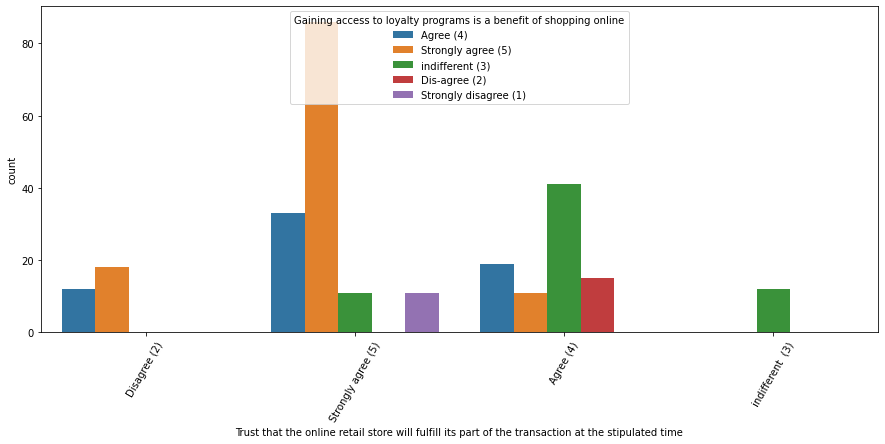

<Figure size 432x288 with 0 Axes>

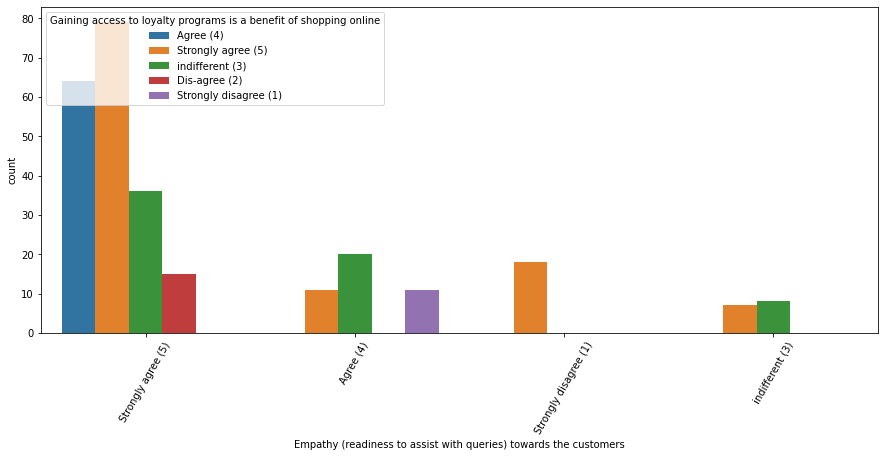

<Figure size 432x288 with 0 Axes>

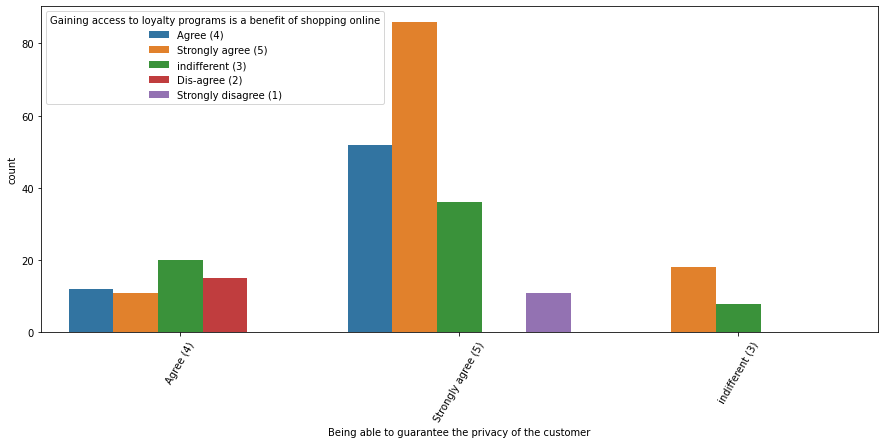

<Figure size 432x288 with 0 Axes>

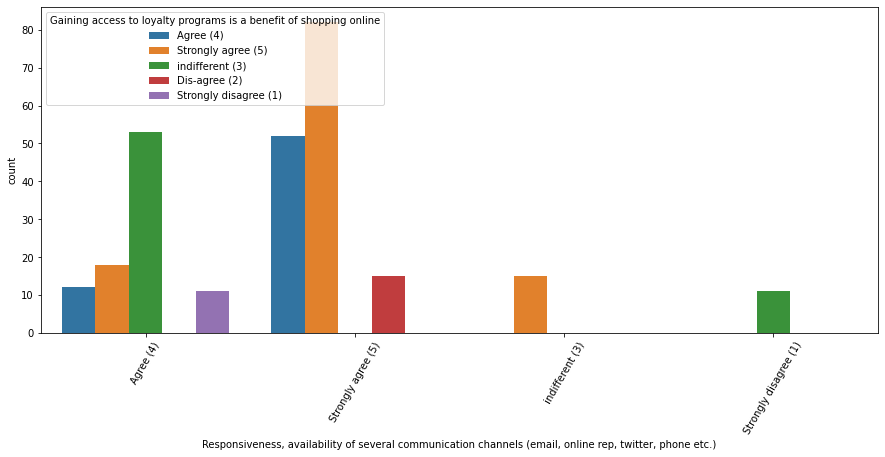

<Figure size 432x288 with 0 Axes>

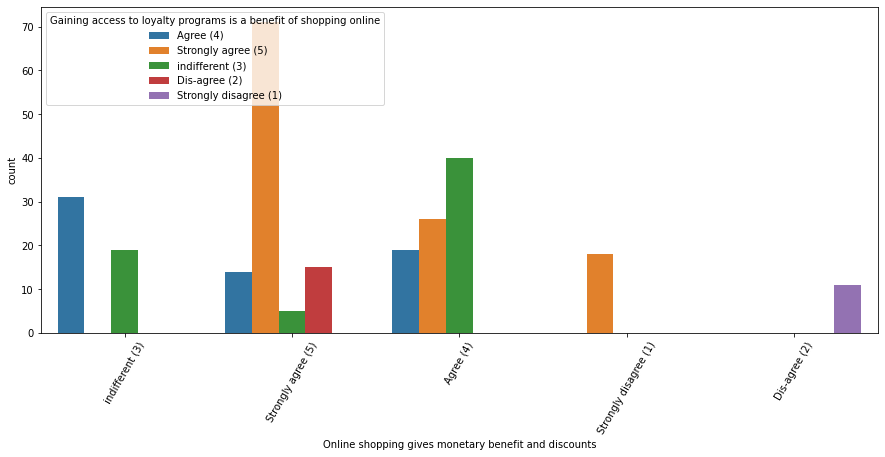

<Figure size 432x288 with 0 Axes>

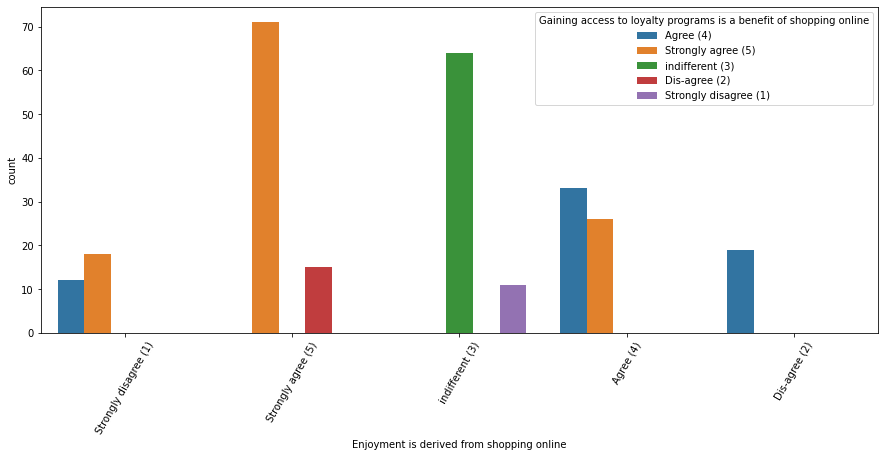

<Figure size 432x288 with 0 Axes>

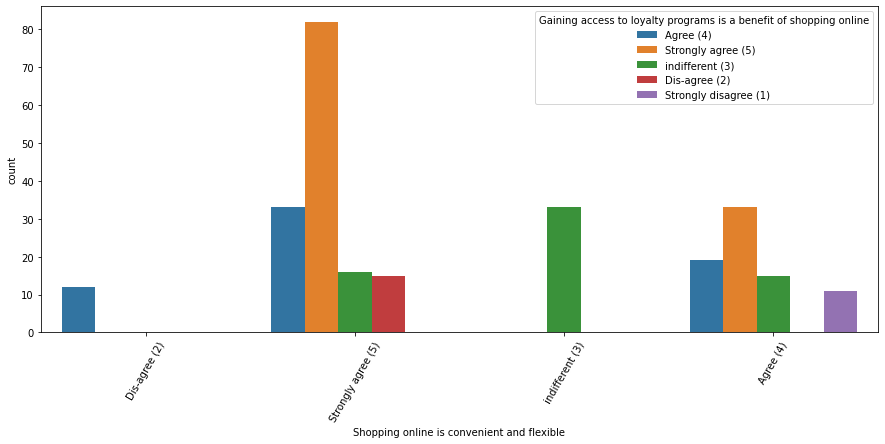

<Figure size 432x288 with 0 Axes>

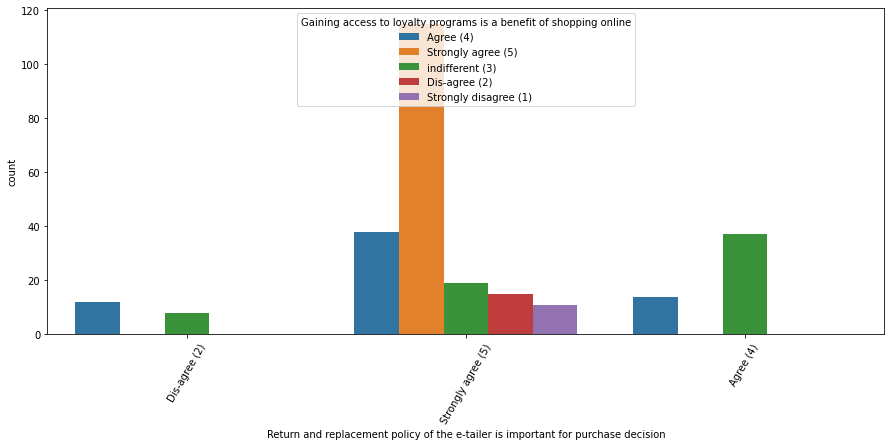

<Figure size 432x288 with 0 Axes>

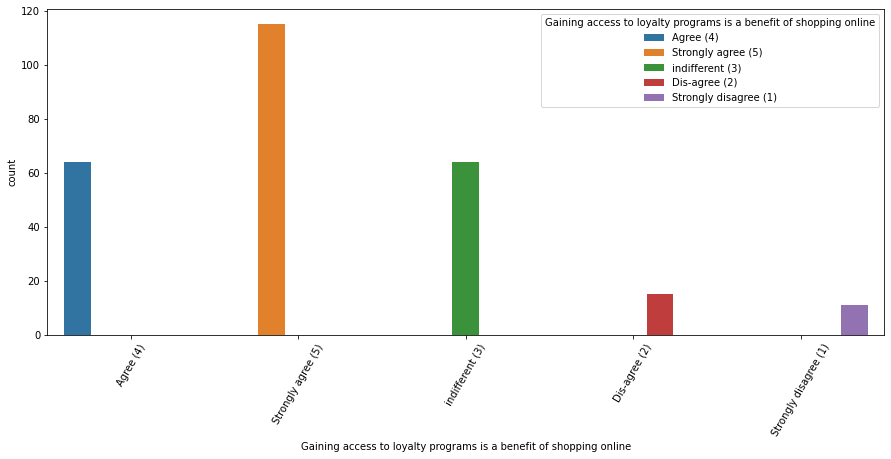

<Figure size 432x288 with 0 Axes>

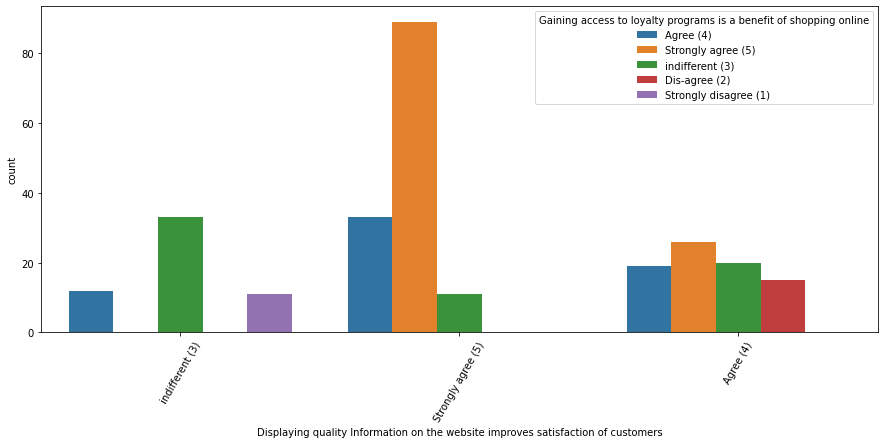

<Figure size 432x288 with 0 Axes>

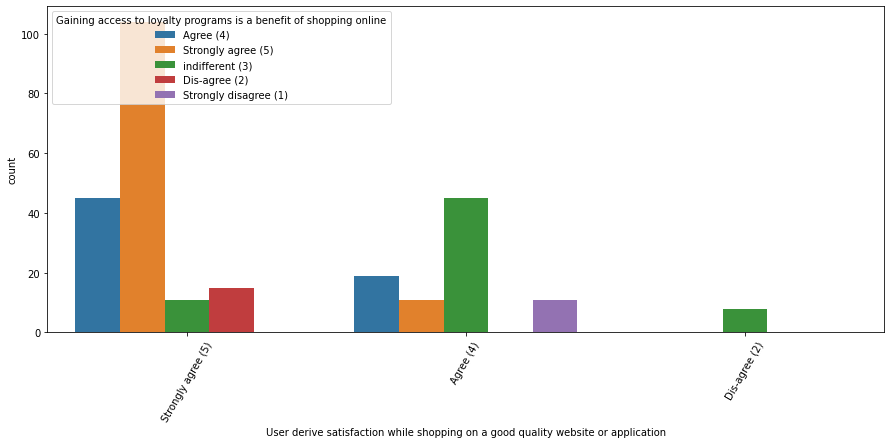

<Figure size 432x288 with 0 Axes>

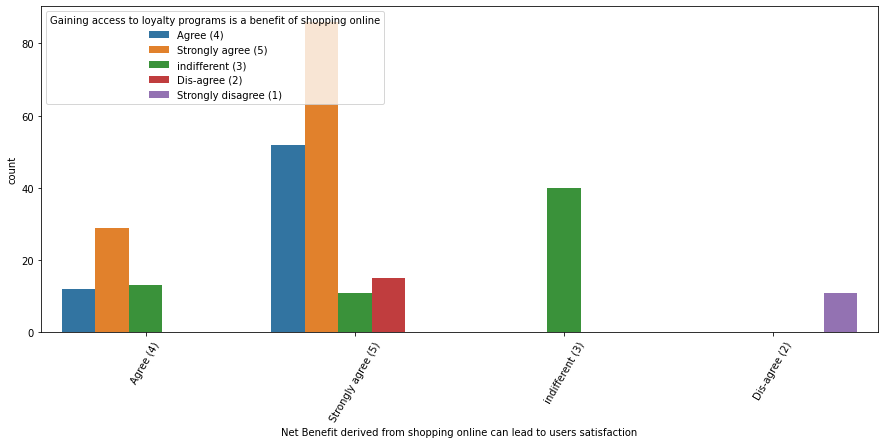

<Figure size 432x288 with 0 Axes>

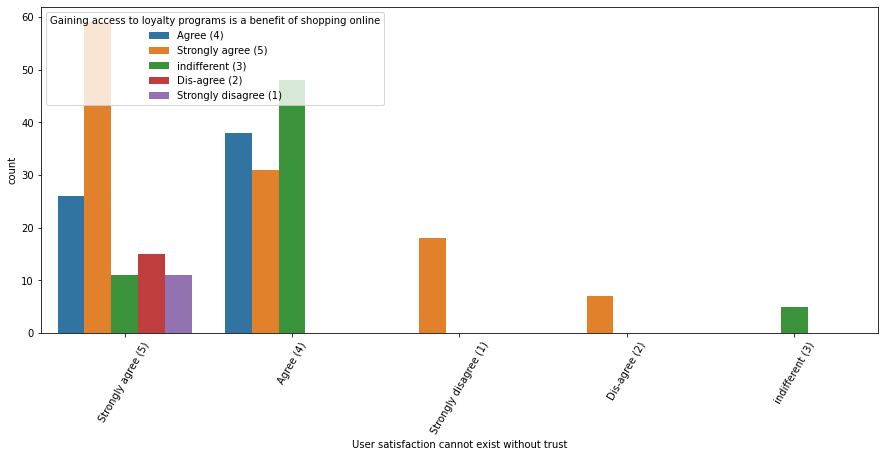

<Figure size 432x288 with 0 Axes>

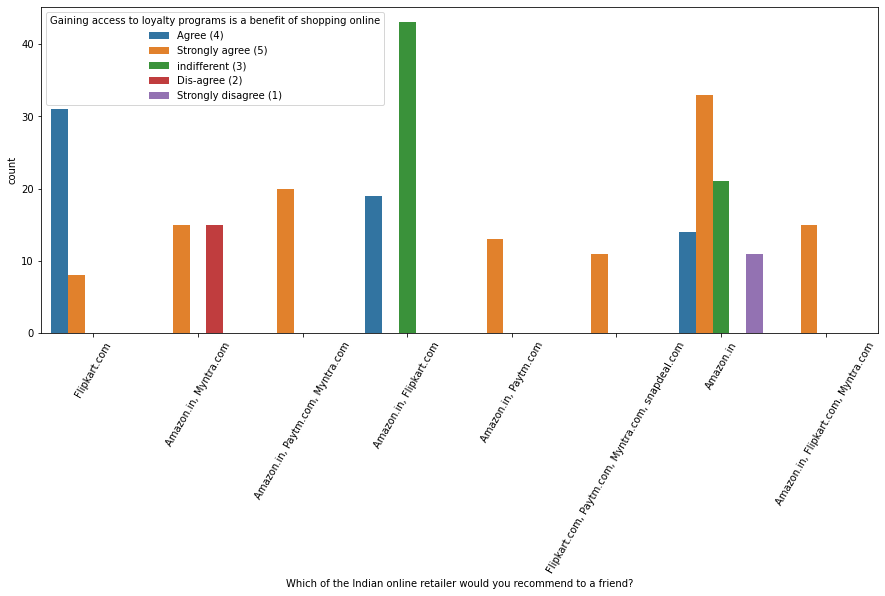

<Figure size 432x288 with 0 Axes>

In [40]:
for i in loyalty:
    plt.figure(figsize=(15,6))
    sns.countplot(data[i],hue=data['Gaining access to loyalty programs is a benefit of shopping online'])
    plt.xticks(rotation=60)
    plt.figure()